**Imports**

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

**Load Dataset**

In [65]:
df = pd.read_csv('data/Base.csv')

**Separate Label and Features**

In [66]:
# Separate out the fraud labels
y = df['fraud_bool']

# Keep features minus fraud label
X = df.drop('fraud_bool', axis=1)

**Feature Engineering**

In [67]:
# Drop 'device_fraud_count' from X_data as it only has a single unique value in the dataset
X = X.drop(labels='device_fraud_count', axis=1)

# One Hot Vector Encoding for Category Features
cat_columns = X.select_dtypes('object').columns
X = pd.get_dummies(X, columns=cat_columns)

**PCA**

<Figure size 640x480 with 0 Axes>

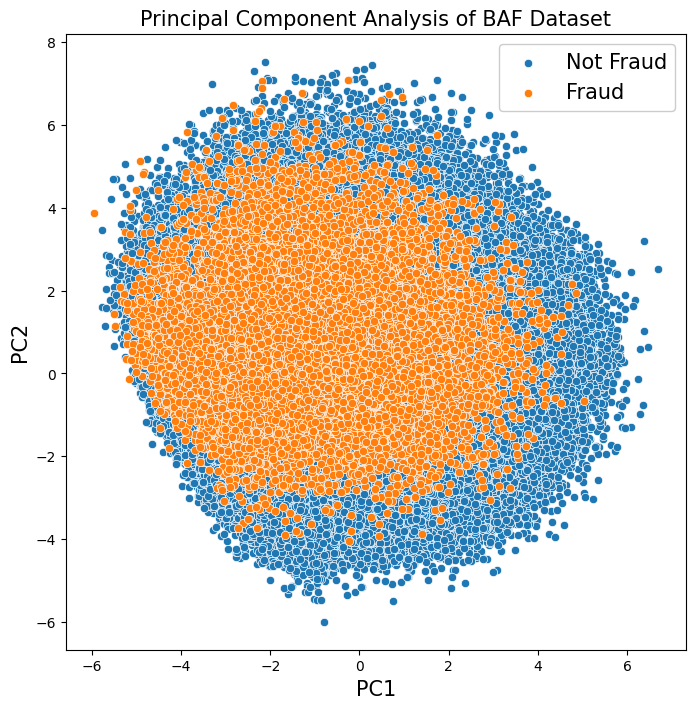

In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled_all_data = scaler.fit_transform(X)


pca_fruad = PCA(n_components=2)
principalComponents_fraud = pca_fruad.fit_transform(X_scaled_all_data)

principal_fraud_Df = pd.DataFrame(data = principalComponents_fraud
             , columns = ['principal component 1', 'principal component 2'])

df_fraud_bool_to_string = df.copy()

def map_fraud(value):
    return 'Fraud' if value == 1 else 'Not Fraud'


df_fraud_bool_to_string['fraud_bool'] = df_fraud_bool_to_string['fraud_bool'].map(map_fraud)

plt.figure()
plt.figure(figsize=(8,8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('PC1',fontsize=15)
plt.ylabel('PC2',fontsize=15)
plt.title("Principal Component Analysis of BAF Dataset", fontsize=15)
targets = ['Not Fraud', 'Fraud']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_fraud_bool_to_string['fraud_bool'] == target
    sns.scatterplot(x=principal_fraud_Df.loc[indicesToKeep, 'principal component 1'],
                    y=principal_fraud_Df.loc[indicesToKeep, 'principal component 2'])

plt.legend(targets,prop={'size': 15}, loc='upper right', framealpha=1)
plt.savefig('plot_images/pca.png', format='png', dpi=600, bbox_inches='tight')
plt.show()


**Correlation Matrix**

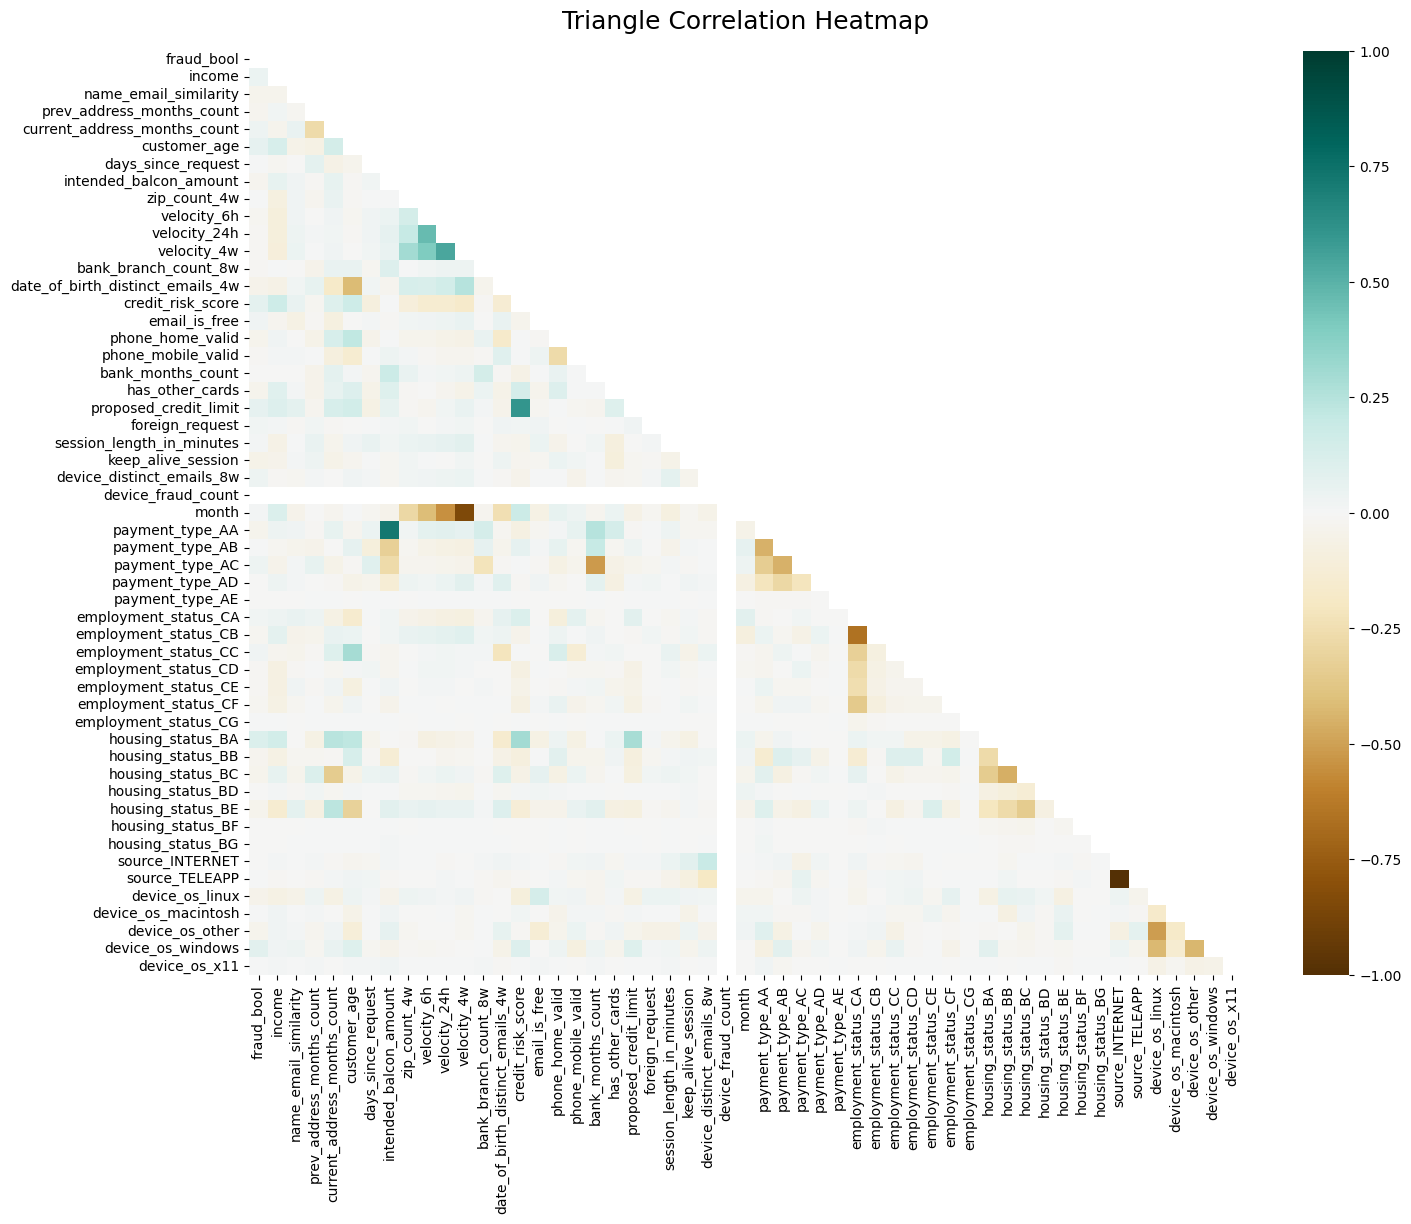

In [69]:
# Generate a large random dataset
plt.figure(figsize=(16, 12))

full_df_hot_encoded = pd.get_dummies(df, columns=cat_columns)
corr = full_df_hot_encoded.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))


heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG')
# Set up the matplotlib figure

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

plt.savefig('plot_images/correlation_heatmap.png', dpi=300, bbox_inches='tight')

**Train / Test Split**

In [7]:
from sklearn.model_selection import train_test_split

set_random_state = 42

# Peform a 75%/25% Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = set_random_state)

In [8]:
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape: ', X_test.shape)
print('y_test Shape: ', y_test.shape)

X_train Shape: (750000, 51)
y_train Shape: (750000,)
X_test Shape:  (250000, 51)
y_test Shape:  (250000,)


**Generate Scaled Dataset**

In [9]:
X_train.head()

income  name_email_similarity  prev_address_months_count  \
494524     0.9               0.707762                         -1   
306517     0.9               0.756983                         -1   
454756     0.7               0.851095                         -1   
84573      0.9               0.763061                         -1   
892561     0.8               0.133586                         -1   

        current_address_months_count  customer_age  days_since_request  \
494524                             4            30            0.026419   
306517                            68            20            0.040217   
454756                           303            40            0.014951   
84573                             27            20            0.008618   
892561                            33            40            0.014382   

        intended_balcon_amount  zip_count_4w  velocity_6h  velocity_24h  ...  \
494524               49.239540           475  2477.277226   4801.134380  ...   
306517               -0.759910          1071  4157.338470   7546.796370  ...   
454756               -1.161162           545  4317.755841   2777.815594  ...   
84573                50.776737           966   410.893516   4355.611708  ...   
892561               -1.165219           668  2566.101161   2162.235746  ...   

        housing_status_BE  housing_status_BF  housing_status_BG  \
494524              False              False              False   
306517              False              False              False   
454756              False              False              False   
84573               False              False              False   
892561              False              False              False   

        source_INTERNET  source_TELEAPP  device_os_linux  device_os_macintosh  \
494524             True           False             True                False   
306517             True           False            False                False   
454756             True           False            False                False   
84573              True           False            False                False   
892561             True           False             True                False   

        device_os_other  device_os_windows  device_os_x11  
494524            False              False          False  
306517            False               True          False  
454756             True              False          False  
84573             False               True          False  
892561            False              False          False  

[5 rows x 51 columns]

**StandardScaler**

In [10]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [11]:
X_train_scaled.head()

income  name_email_similarity  prev_address_months_count  \
0  1.161340               0.740454                  -0.402383   
1  1.161340               0.910735                  -0.402383   
2  0.472625               1.236324                  -0.402383   
3  1.161340               0.931762                  -0.402383   
4  0.816982              -1.245952                  -0.402383   

   current_address_months_count  customer_age  days_since_request  \
0                     -0.934568     -0.307466           -0.185560   
1                     -0.210814     -1.138954           -0.183001   
2                      2.446718      0.524021           -0.187687   
3                     -0.674469     -1.138954           -0.188861   
4                     -0.606617      0.524021           -0.187792   

   intended_balcon_amount  zip_count_4w  velocity_6h  velocity_24h  ...  \
0                2.004846     -1.092478    -1.058760      0.020882  ...   
1               -0.465733     -0.499336    -0.500563      1.876309  ...   
2               -0.485560     -1.022813    -0.447264     -1.346410  ...   
3                2.080802     -0.603832    -1.745312     -0.280188  ...   
4               -0.485761     -0.900403    -1.029248     -1.762398  ...   

   housing_status_BE  housing_status_BF  housing_status_BG  source_INTERNET  \
0          -0.451029          -0.041509           -0.01596         0.084362   
1          -0.451029          -0.041509           -0.01596         0.084362   
2          -0.451029          -0.041509           -0.01596         0.084362   
3          -0.451029          -0.041509           -0.01596         0.084362   
4          -0.451029          -0.041509           -0.01596         0.084362   

   source_TELEAPP  device_os_linux  device_os_macintosh  device_os_other  \
0       -0.084362         1.416176             -0.23847        -0.722048   
1       -0.084362        -0.706127             -0.23847        -0.722048   
2       -0.084362        -0.706127             -0.23847         1.384949   
3       -0.084362        -0.706127             -0.23847        -0.722048   
4       -0.084362         1.416176             -0.23847        -0.722048   

   device_os_windows  device_os_x11  
0          -0.598195      -0.085453  
1           1.671696      -0.085453  
2          -0.598195      -0.085453  
3           1.671696      -0.085453  
4          -0.598195      -0.085453  

[5 rows x 51 columns]

**Metric Scoring**

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

def get_scores(model_dict, sampler_dict):

    results_metric, results_prob, results_pred = [], [], []

    for model_name, model in model_dict.items():
        for sampler_name, sampler in sampler_dict.items():
            print('Starting: ', model_name, sampler_name)
            if sampler:
                if 'RandomUnderSampler' in sampler_name:
                    pipeline = ImbPipeline([('sampler', sampler), 
                                            ('under', RandomUnderSampler(sampling_strategy=0.5, random_state=set_random_state)), 
                                            ('clf', model)])
                else:
                    pipeline = ImbPipeline([('sampler', sampler), ('clf', model)])
            else:
                pipeline = Pipeline([('sampler', sampler), ('clf', model)])
            
            # Change feature dataset if needs to be scaled
            if 'scaled' in model_name:
                 pipeline.fit(X_train_scaled, y_train)
            else:     
                pipeline.fit(X_train, y_train)
            
            # Get preditions and probabilities
            preds = pipeline.predict(X_test)
            probs = pipeline.predict_proba(X_test)
            probs = probs[:, 1]

            scoring = {'Precision': precision_score,
                       'Recall': recall_score,
                       'F1-Score': f1_score,
                       'ROC AUC': roc_auc_score}

            scores = {}
            for metric_name, metric in scoring.items():
                    score = metric(y_test, preds)
                    scores[metric_name] = score

            result_metric = {'Model': model_name,
                             'Resampler': sampler_name,
                             **scores}
            result_prob = (model_name, sampler_name, probs)
            
            result_pred = (model_name, sampler_name, preds)
                    
            results_metric.append(result_metric)
            results_prob.append(result_prob)
            results_pred.append(result_pred)
            
    return pd.DataFrame(results_metric), results_prob, results_pred


**Classification Models**

In [13]:
# Model Imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

set_num_jobs = 8
set_max_iter = 8000
set_n_estimators = 200

# Models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=set_max_iter, random_state=set_random_state, n_jobs=set_num_jobs),
    'Logistic Regression (scaled)': LogisticRegression(max_iter=set_max_iter, random_state=set_random_state, n_jobs=set_num_jobs),
    'Logistic Regression (balanced)': LogisticRegression(class_weight='balanced', max_iter=set_max_iter, random_state=set_random_state, n_jobs=set_num_jobs),
    'Logistic Regression (scaled, balanced)': LogisticRegression(class_weight='balanced', max_iter=set_max_iter, random_state=set_random_state, n_jobs=set_num_jobs),
    'Decision Tree': DecisionTreeClassifier(random_state=set_random_state),
    'Decision Tree (balanced)': DecisionTreeClassifier(class_weight='balanced', random_state=set_random_state),
    'Random Forest': RandomForestClassifier(n_estimators=set_n_estimators, random_state=set_random_state, n_jobs=set_num_jobs),
    'Random Forest (balanced)': RandomForestClassifier(class_weight='balanced', n_estimators=set_n_estimators, random_state=set_random_state, n_jobs=set_num_jobs),
    'Gradient Boosting': GradientBoostingClassifier(random_state=set_random_state),
    'LightGBM': LGBMClassifier(random_state=set_random_state, n_jobs=set_num_jobs, verbose=0),
    'LightGBM (balanced)': LGBMClassifier(class_weight='balanced', random_state=set_random_state, n_jobs=set_num_jobs, verbose=0),
    'LightGBM (scaled, balanced)': LGBMClassifier(class_weight='balanced', random_state=set_random_state, n_jobs=set_num_jobs, verbose=0),
    'XGBoost': XGBClassifier(random_state=set_random_state, n_jobs=4)
}

**Under / Over Sampling Methods**

In [14]:
# Sampling Imports
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# Resampling methods to test for imbalanced data
resampling_methods = {
    'No Resampling': None,
    'SMOTE': SMOTE(sampling_strategy=0.1, random_state=set_random_state),
    'SMOTE RandomUnderSampler': SMOTE(sampling_strategy=0.1, random_state=set_random_state),
    'NearMiss': NearMiss(sampling_strategy=0.1)
}

**Generate Scores for Models + Resampling**

In [15]:
# Generate and fit models
# results_metrics_generated, results_prob_generated, results_pred_generated = get_scores(models, resampling_methods)

# Note, can load the saved results in next cell instead of re-running code (takes ~40 mins to train/fit)

**Save and Load Results from Model Fitting**

In [16]:
# Note, it is not necessary to re-run get_scores. Results can be loaded from:
# 'final_project_results_metrics.csv'
# 'final_project_results_prob.pkl'
# 'final_project_results_pred.pkl'

import pickle

# Save Model Metric Scores
# results_metrics_generated.to_csv('final_project_results_metrics.csv')
# Save Model Probabilities
# with open('final_project_results_prob.pkl', 'wb') as fp:   #Pickling
#     pickle.dump(results_prob_generated, fp)
# Save Models Predictions
# with open('final_project_results_pred.pkl', 'wb') as fp:   #Pickling
#     pickle.dump(results_pred_generated, fp)


# Load Model Metric Scores
results_metric = pd.read_csv('final_project_results_metrics.csv')
# Load Model Probabilities
with open('final_project_results_prob.pkl', 'rb') as fp:   # Unpickling
    results_prob = pickle.load(fp)
# Load Model Predictions
with open('final_project_results_pred.pkl', 'rb') as fp:   # Unpickling
    results_pred = pickle.load(fp)


# Remove redundent first index column.
results_metric.drop("Unnamed: 0", axis=1, inplace=True)

results_metric

Model                 Resampler  \
0                      Logistic Regression             No Resampling   
1                      Logistic Regression                     SMOTE   
2                      Logistic Regression  SMOTE RandomUnderSampler   
3                      Logistic Regression                  NearMiss   
4             Logistic Regression (scaled)             No Resampling   
5             Logistic Regression (scaled)                     SMOTE   
6             Logistic Regression (scaled)  SMOTE RandomUnderSampler   
7             Logistic Regression (scaled)                  NearMiss   
8           Logistic Regression (balanced)             No Resampling   
9           Logistic Regression (balanced)                     SMOTE   
10          Logistic Regression (balanced)  SMOTE RandomUnderSampler   
11          Logistic Regression (balanced)                  NearMiss   
12  Logistic Regression (scaled, balanced)             No Resampling   
13  Logistic Regression (scaled, balanced)                     SMOTE   
14  Logistic Regression (scaled, balanced)  SMOTE RandomUnderSampler   
15  Logistic Regression (scaled, balanced)                  NearMiss   
16                           Decision Tree             No Resampling   
17                           Decision Tree                     SMOTE   
18                           Decision Tree  SMOTE RandomUnderSampler   
19                           Decision Tree                  NearMiss   
20                Decision Tree (balanced)             No Resampling   
21                Decision Tree (balanced)                     SMOTE   
22                Decision Tree (balanced)  SMOTE RandomUnderSampler   
23                Decision Tree (balanced)                  NearMiss   
24                           Random Forest             No Resampling   
25                           Random Forest                     SMOTE   
26                           Random Forest  SMOTE RandomUnderSampler   
27                           Random Forest                  NearMiss   
28                Random Forest (balanced)             No Resampling   
29                Random Forest (balanced)                     SMOTE   
30                Random Forest (balanced)  SMOTE RandomUnderSampler   
31                Random Forest (balanced)                  NearMiss   
32                       Gradient Boosting             No Resampling   
33                       Gradient Boosting                     SMOTE   
34                       Gradient Boosting  SMOTE RandomUnderSampler   
35                       Gradient Boosting                  NearMiss   
36                                LightGBM             No Resampling   
37                                LightGBM                     SMOTE   
38                                LightGBM  SMOTE RandomUnderSampler   
39                                LightGBM                  NearMiss   
40                     LightGBM (balanced)             No Resampling   
41                     LightGBM (balanced)                     SMOTE   
42                     LightGBM (balanced)  SMOTE RandomUnderSampler   
43                     LightGBM (balanced)                  NearMiss   
44             LightGBM (scaled, balanced)             No Resampling   
45             LightGBM (scaled, balanced)                     SMOTE   
46             LightGBM (scaled, balanced)  SMOTE RandomUnderSampler   
47             LightGBM (scaled, balanced)                  NearMiss   
48                                 XGBoost             No Resampling   
49                                 XGBoost                     SMOTE   
50                                 XGBoost  SMOTE RandomUnderSampler   
51                                 XGBoost                  NearMiss   

    Precision    Recall  F1-Score   ROC AUC  
0    0.620690  0.006529  0.012922  0.503242  
1    0.151904  0.124411  0.136790  0.558333  
2    0.102774  0.282191  0.150673  0.627360  
3    0.025947  0.454117  0.049089  0

In [17]:
# Add ROC AUC Score Based off probabilities instead of predictions to dataframe

roc_auc_prob = []
for model_name, sampler_name, probs in results_prob:
    model_auc = roc_auc_score(y_test, probs)
    roc_auc_prob.append(model_auc)

results_metric_roc_probs = results_metric.copy(deep=True)

results_metric_roc_probs['ROC AUC Prob'] = np.array(roc_auc_prob)

results_metric_roc_probs

Model                 Resampler  \
0                      Logistic Regression             No Resampling   
1                      Logistic Regression                     SMOTE   
2                      Logistic Regression  SMOTE RandomUnderSampler   
3                      Logistic Regression                  NearMiss   
4             Logistic Regression (scaled)             No Resampling   
5             Logistic Regression (scaled)                     SMOTE   
6             Logistic Regression (scaled)  SMOTE RandomUnderSampler   
7             Logistic Regression (scaled)                  NearMiss   
8           Logistic Regression (balanced)             No Resampling   
9           Logistic Regression (balanced)                     SMOTE   
10          Logistic Regression (balanced)  SMOTE RandomUnderSampler   
11          Logistic Regression (balanced)                  NearMiss   
12  Logistic Regression (scaled, balanced)             No Resampling   
13  Logistic Regression (scaled, balanced)                     SMOTE   
14  Logistic Regression (scaled, balanced)  SMOTE RandomUnderSampler   
15  Logistic Regression (scaled, balanced)                  NearMiss   
16                           Decision Tree             No Resampling   
17                           Decision Tree                     SMOTE   
18                           Decision Tree  SMOTE RandomUnderSampler   
19                           Decision Tree                  NearMiss   
20                Decision Tree (balanced)             No Resampling   
21                Decision Tree (balanced)                     SMOTE   
22                Decision Tree (balanced)  SMOTE RandomUnderSampler   
23                Decision Tree (balanced)                  NearMiss   
24                           Random Forest             No Resampling   
25                           Random Forest                     SMOTE   
26                           Random Forest  SMOTE RandomUnderSampler   
27                           Random Forest                  NearMiss   
28                Random Forest (balanced)             No Resampling   
29                Random Forest (balanced)                     SMOTE   
30                Random Forest (balanced)  SMOTE RandomUnderSampler   
31                Random Forest (balanced)                  NearMiss   
32                       Gradient Boosting             No Resampling   
33                       Gradient Boosting                     SMOTE   
34                       Gradient Boosting  SMOTE RandomUnderSampler   
35                       Gradient Boosting                  NearMiss   
36                                LightGBM             No Resampling   
37                                LightGBM                     SMOTE   
38                                LightGBM  SMOTE RandomUnderSampler   
39                                LightGBM                  NearMiss   
40                     LightGBM (balanced)             No Resampling   
41                     LightGBM (balanced)                     SMOTE   
42                     LightGBM (balanced)  SMOTE RandomUnderSampler   
43                     LightGBM (balanced)                  NearMiss   
44             LightGBM (scaled, balanced)             No Resampling   
45             LightGBM (scaled, balanced)                     SMOTE   
46             LightGBM (scaled, balanced)  SMOTE RandomUnderSampler   
47             LightGBM (scaled, balanced)                  NearMiss   
48                                 XGBoost             No Resampling   
49                                 XGBoost                     SMOTE   
50                                 XGBoost  SMOTE RandomUnderSampler   
51                                 XGBoost                  NearMiss   

    Precision    Recall  F1-Score   ROC AUC  ROC AUC Prob  
0    0.620690  0.006529  0.012922  0.503242      0.864610  
1    0.151904  0.124411  0.136790  0.558333      0.823406  
2    0.102774  0.282191  0.150673  0.627

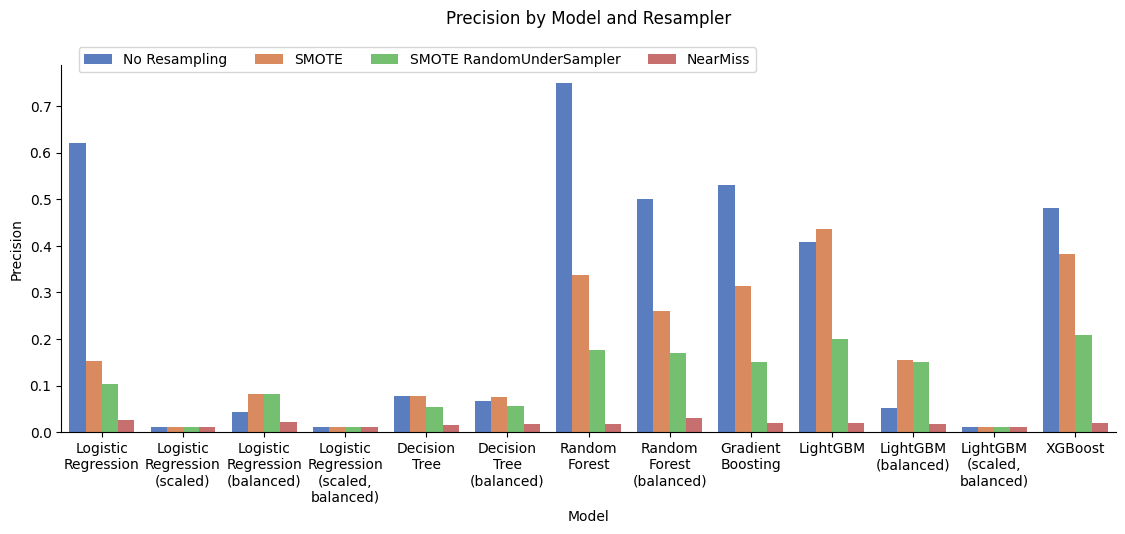

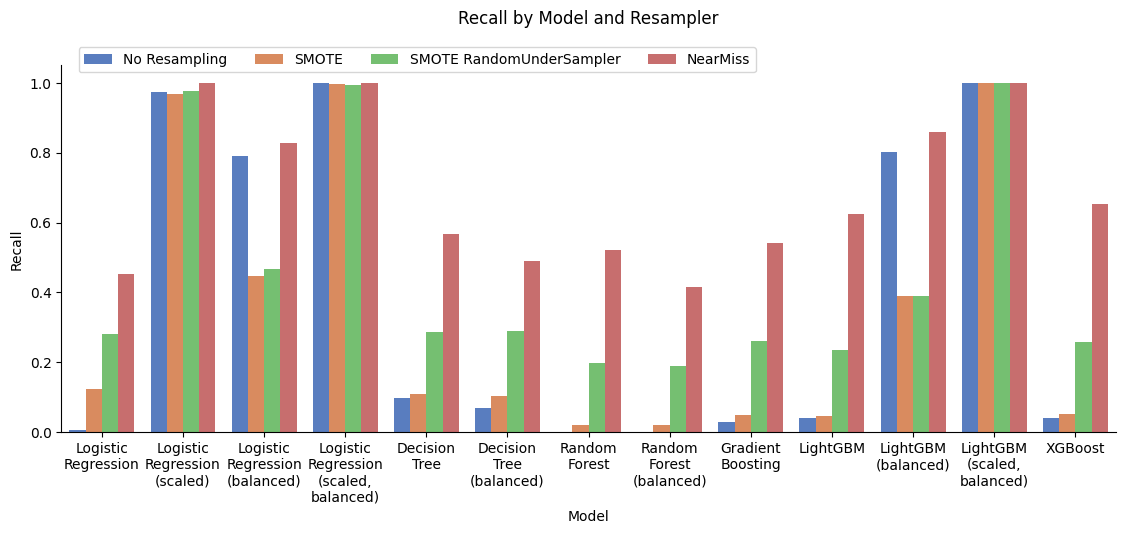

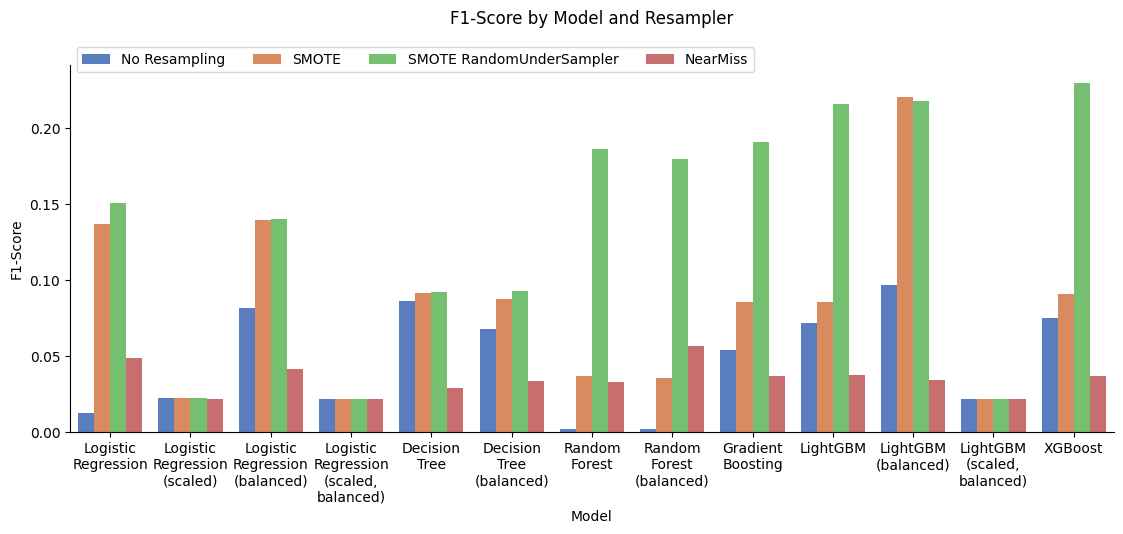

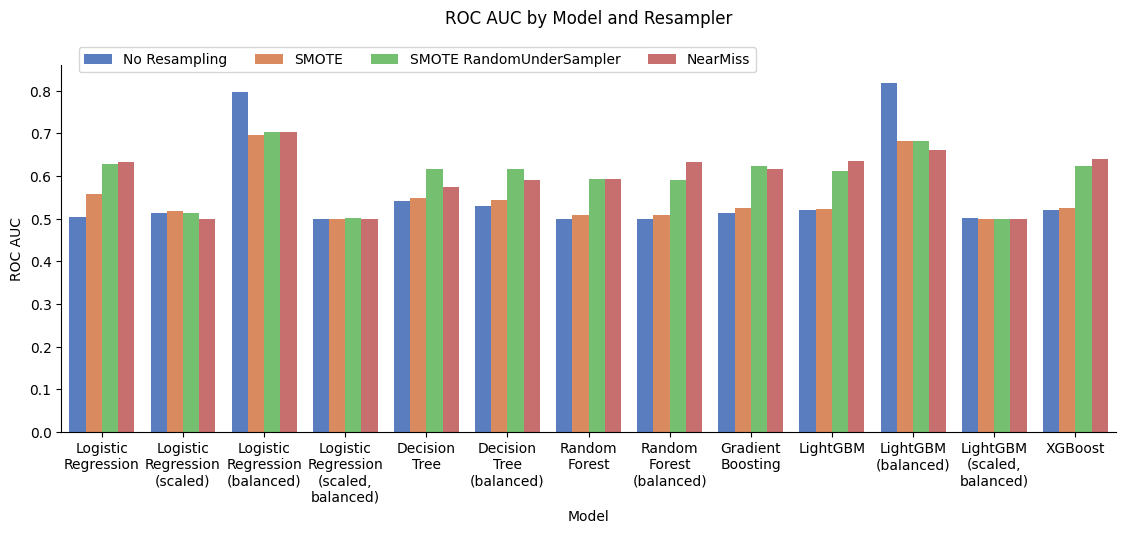

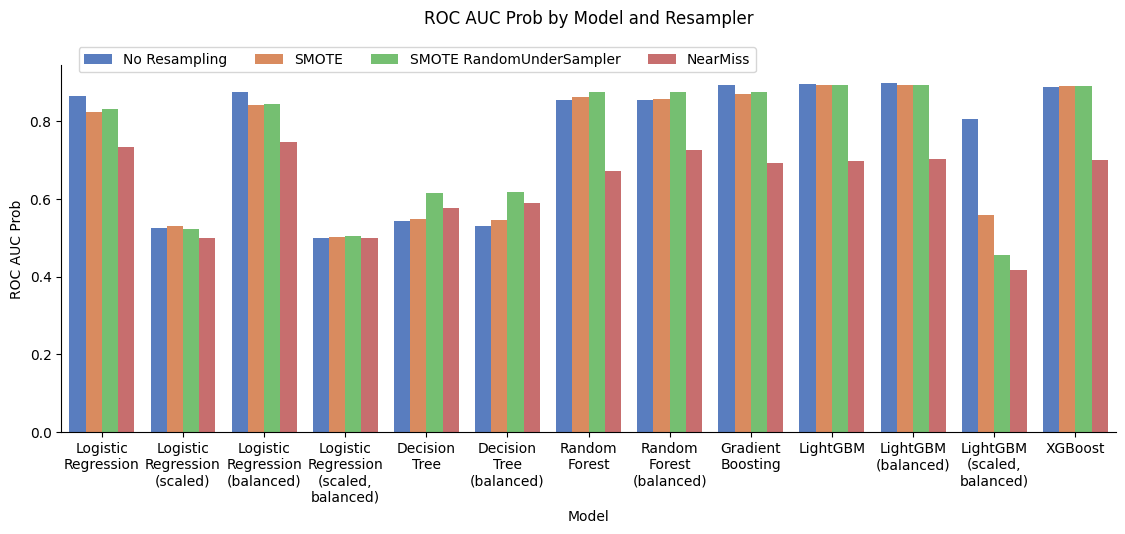

In [59]:
import textwrap

set_color_palette = 'muted'

metrics = ['Precision', 'Recall', 'F1-Score', 'ROC AUC', 'ROC AUC Prob']

for metric in metrics:
    g = sns.catplot(data=results_metric_roc_probs, x='Model', y=metric, hue='Resampler', kind='bar', palette=set_color_palette, errorbar=None, height=5, aspect=11.5/5)
    sns.move_legend(g, "upper left", bbox_to_anchor=(0.065, 0.9), ncol=4, title=None, frameon=True)
    g.figure.subplots_adjust(top=0.85)
    plt.title(f'{metric} by Model and Resampler', pad=30)
    # iterate over axes of FacetGrid
    for ax in g.axes.flat:
        labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
        g.set_xticklabels(labels)
    fig_name = ('plot_images/metric_scores/metric_scores_' + metric + '.png').lower()
    plt.savefig(fig_name, format='png', dpi=600, bbox_inches='tight')
    plt.show()

In [19]:
# Sort dataframe by ROC AUC Prob

results_metric_roc_probs.sort_values(by=['ROC AUC Prob'])

Model                 Resampler  \
47             LightGBM (scaled, balanced)                  NearMiss   
46             LightGBM (scaled, balanced)  SMOTE RandomUnderSampler   
7             Logistic Regression (scaled)                  NearMiss   
15  Logistic Regression (scaled, balanced)                  NearMiss   
12  Logistic Regression (scaled, balanced)             No Resampling   
13  Logistic Regression (scaled, balanced)                     SMOTE   
14  Logistic Regression (scaled, balanced)  SMOTE RandomUnderSampler   
6             Logistic Regression (scaled)  SMOTE RandomUnderSampler   
4             Logistic Regression (scaled)             No Resampling   
5             Logistic Regression (scaled)                     SMOTE   
20                Decision Tree (balanced)             No Resampling   
16                           Decision Tree             No Resampling   
21                Decision Tree (balanced)                     SMOTE   
17                           Decision Tree                     SMOTE   
45             LightGBM (scaled, balanced)                     SMOTE   
19                           Decision Tree                  NearMiss   
23                Decision Tree (balanced)                  NearMiss   
18                           Decision Tree  SMOTE RandomUnderSampler   
22                Decision Tree (balanced)  SMOTE RandomUnderSampler   
27                           Random Forest                  NearMiss   
35                       Gradient Boosting                  NearMiss   
39                                LightGBM                  NearMiss   
51                                 XGBoost                  NearMiss   
43                     LightGBM (balanced)                  NearMiss   
31                Random Forest (balanced)                  NearMiss   
3                      Logistic Regression                  NearMiss   
11          Logistic Regression (balanced)                  NearMiss   
44             LightGBM (scaled, balanced)             No Resampling   
1                      Logistic Regression                     SMOTE   
2                      Logistic Regression  SMOTE RandomUnderSampler   
9           Logistic Regression (balanced)                     SMOTE   
10          Logistic Regression (balanced)  SMOTE RandomUnderSampler   
24                           Random Forest             No Resampling   
28                Random Forest (balanced)             No Resampling   
29                Random Forest (balanced)                     SMOTE   
25                           Random Forest                     SMOTE   
0                      Logistic Regression             No Resampling   
33                       Gradient Boosting                     SMOTE   
34                       Gradient Boosting  SMOTE RandomUnderSampler   
8           Logistic Regression (balanced)             No Resampling   
26                           Random Forest  SMOTE RandomUnderSampler   
30                Random Forest (balanced)  SMOTE RandomUnderSampler   
48                                 XGBoost             No Resampling   
50                                 XGBoost  SMOTE RandomUnderSampler   
49                                 XGBoost                     SMOTE   
32                       Gradient Boosting             No Resampling   
42                     LightGBM (balanced)  SMOTE RandomUnderSampler   
38                                LightGBM  SMOTE RandomUnderSampler   
41                     LightGBM (balanced)                     SMOTE   
37                                LightGBM                     SMOTE   
36                                LightGBM             No Resampling   
40                     LightGBM (balanced)             No Resampling   

    Precision    Recall  F1-Score   ROC AUC  ROC AUC Prob  
47   0.011028  1.000000  0.021815  0.500000      0.415925  
46   0.011028  1.000000  0.021815  0.500000      0.455173  
7    0.011028  1.000000  0.021815  0.500

**Generate ROC Curves with Matplotlib**

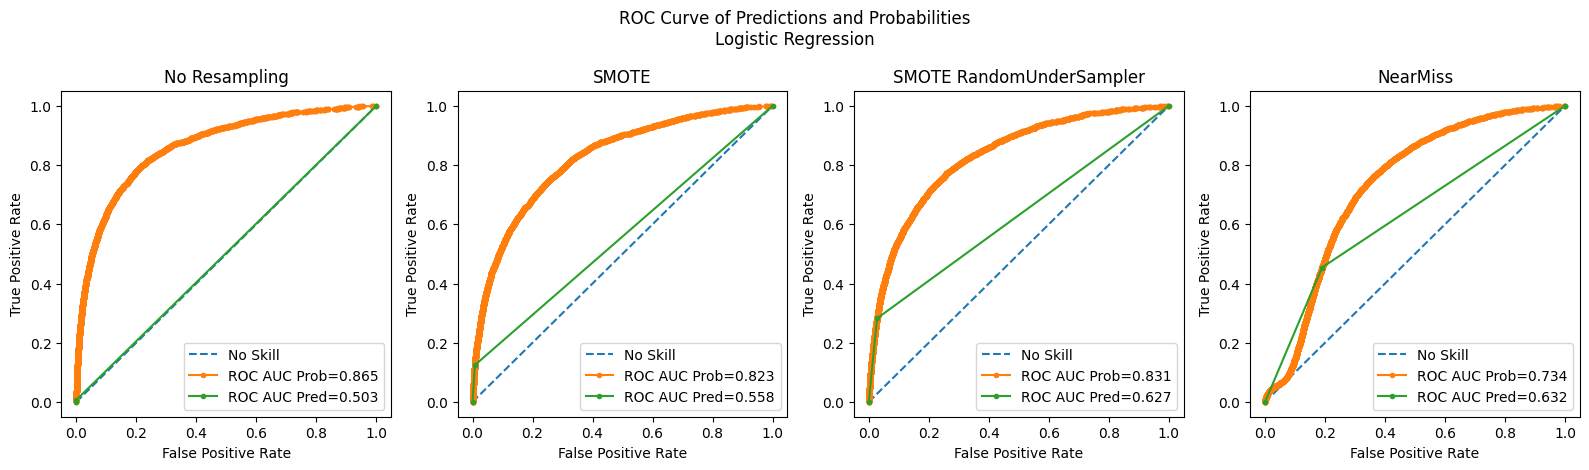

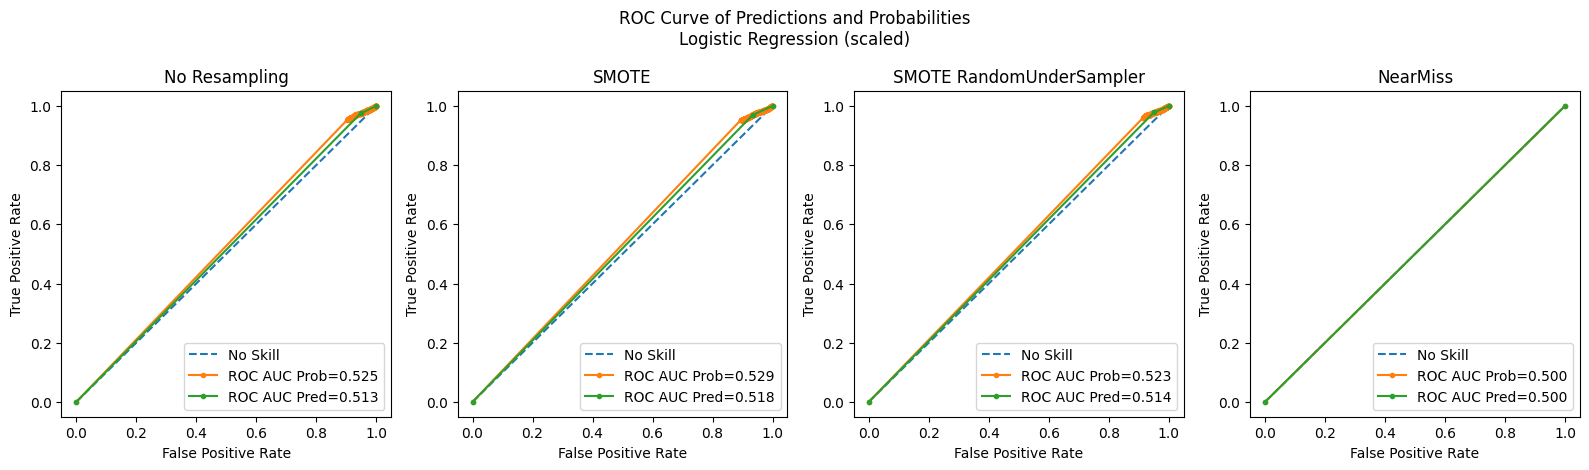

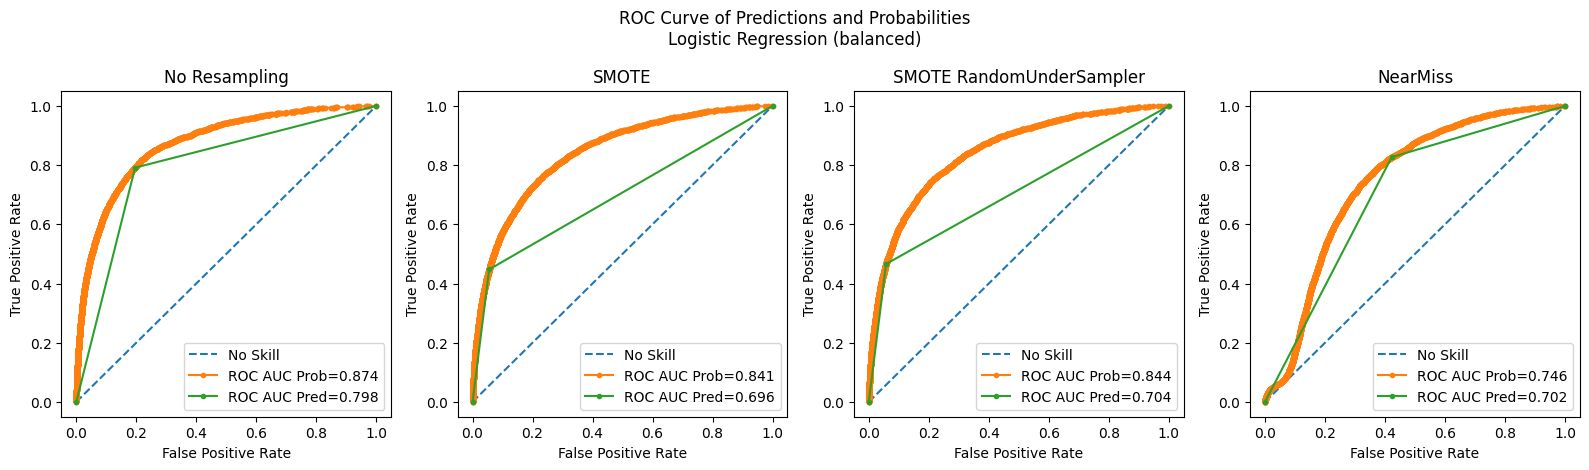

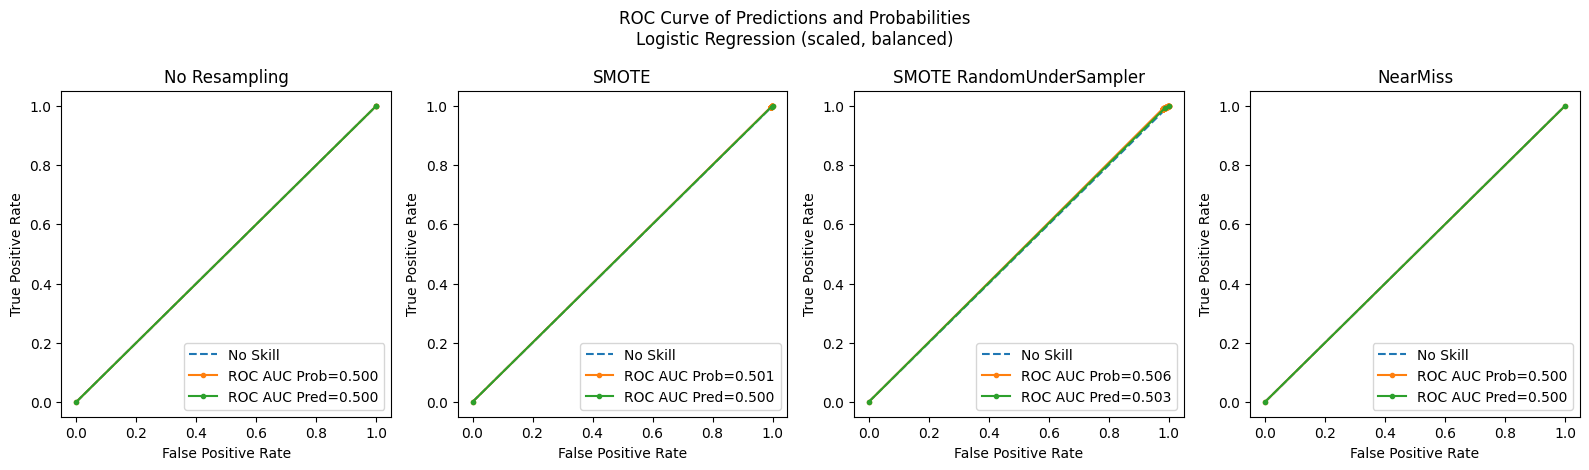

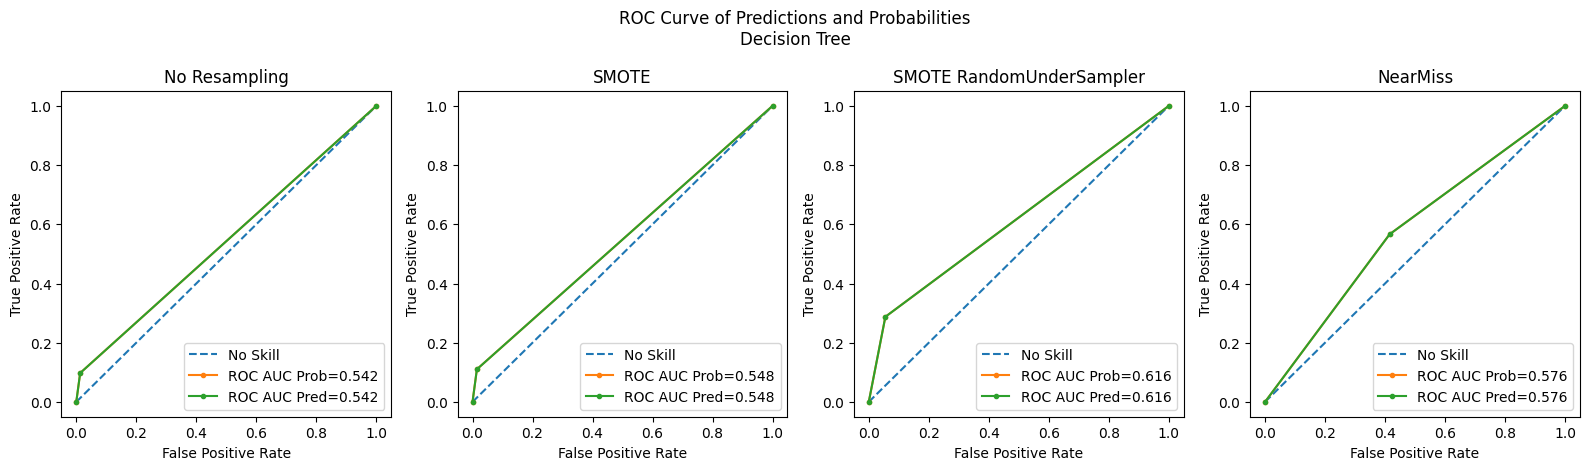

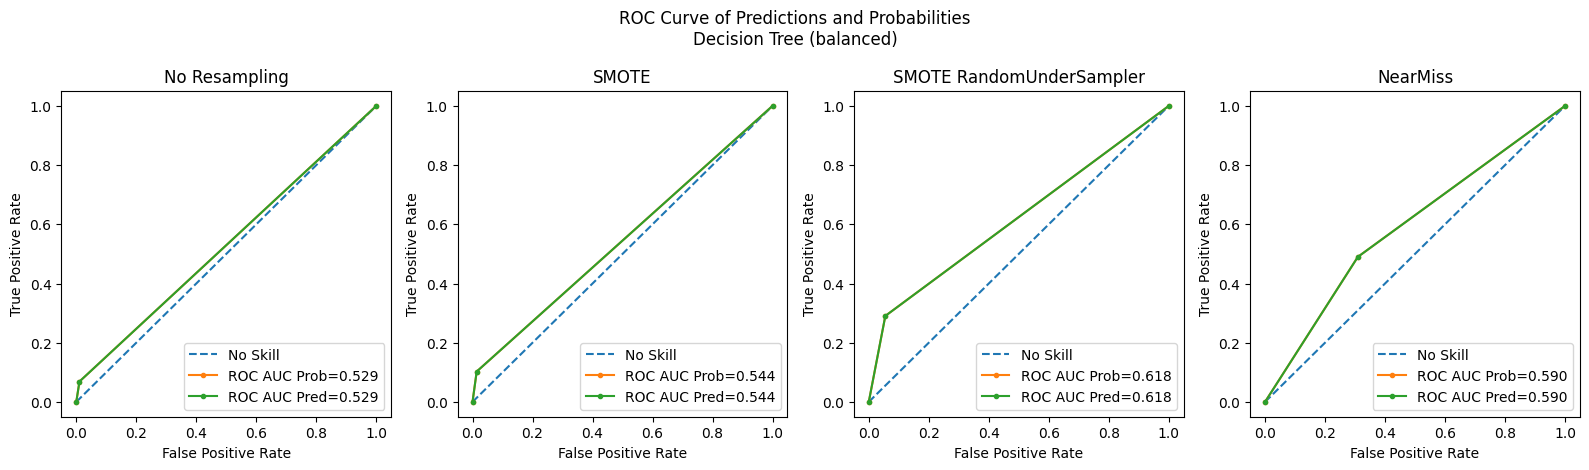

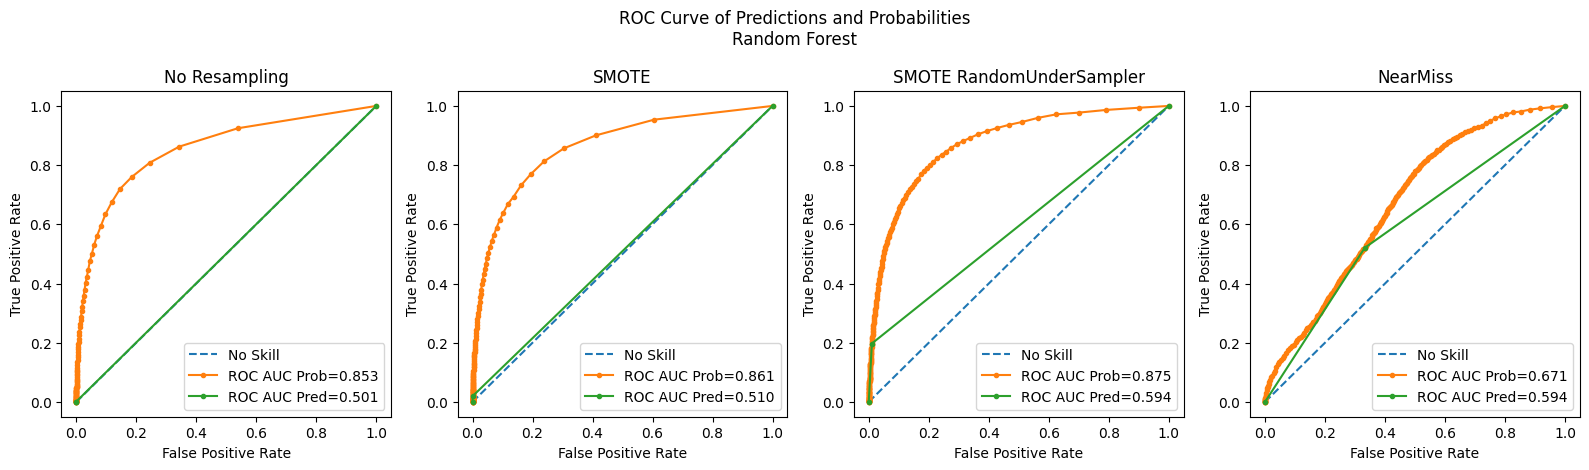

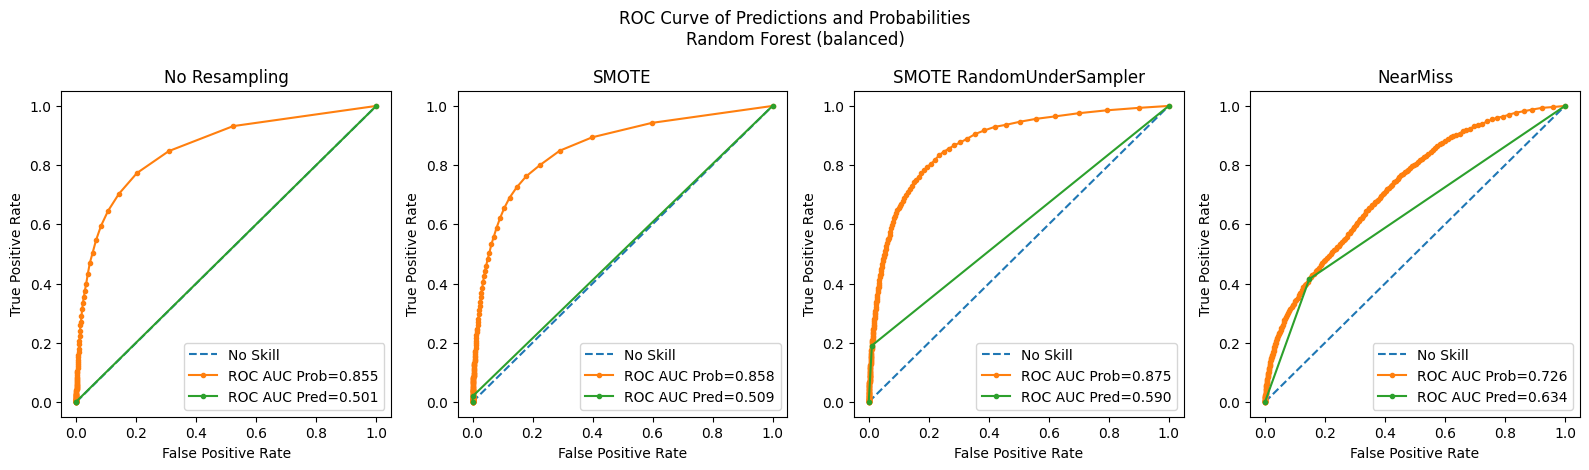

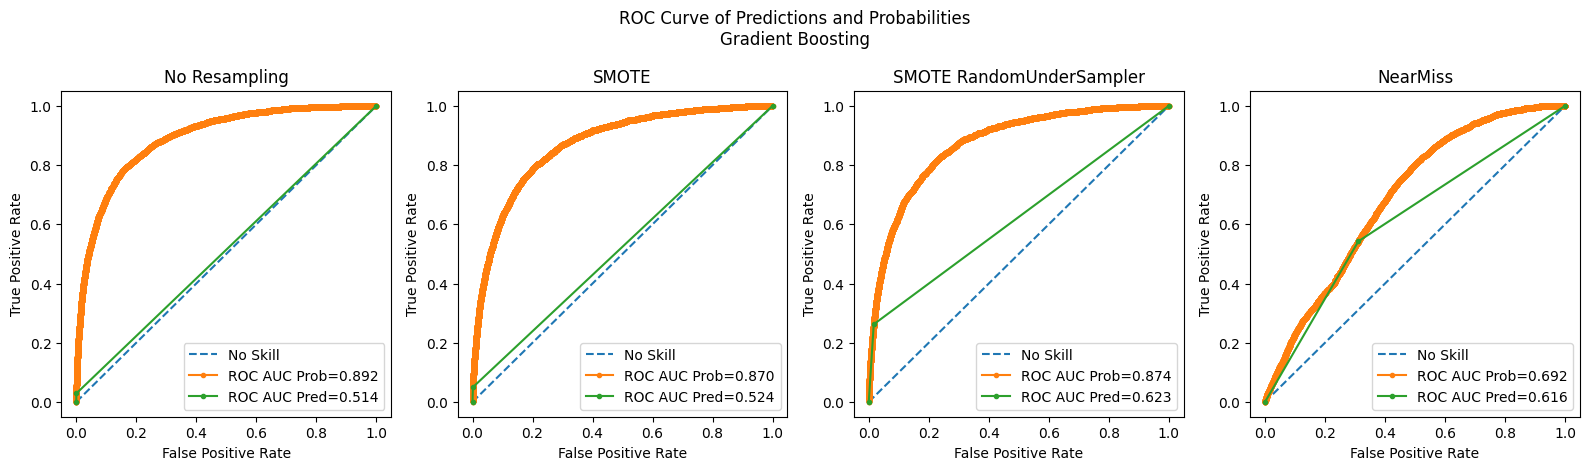

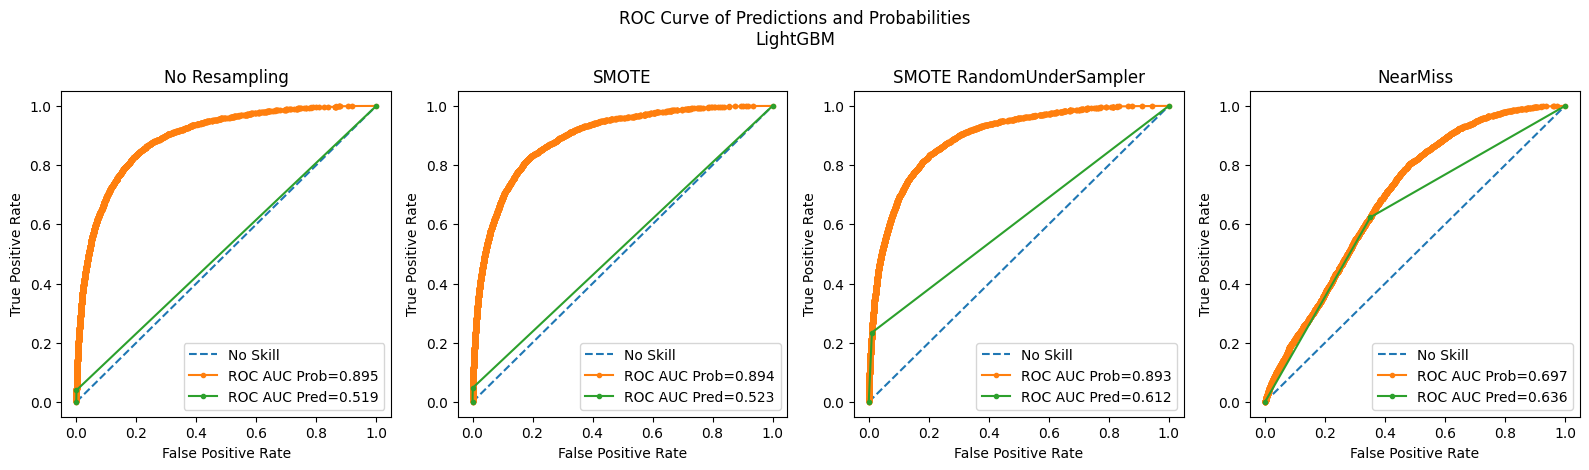

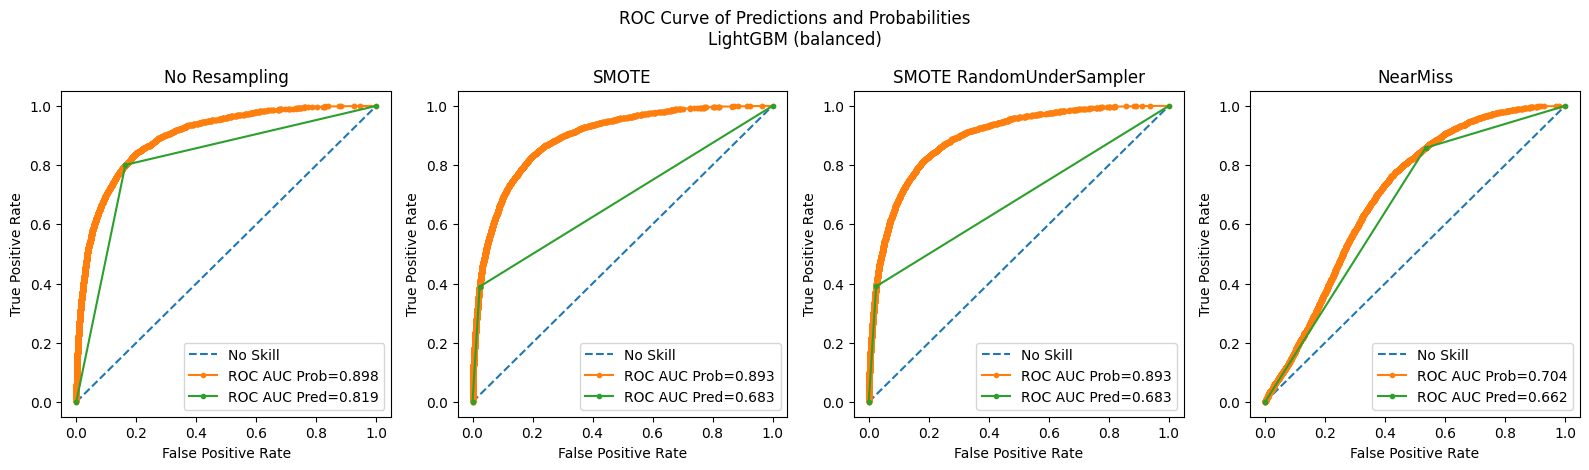

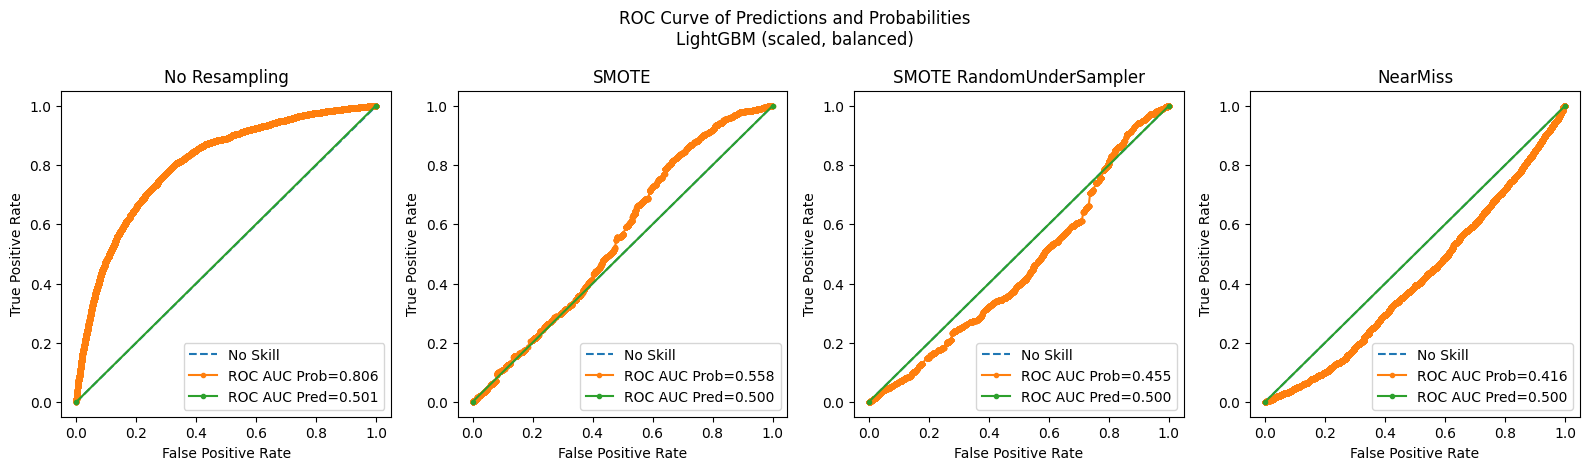

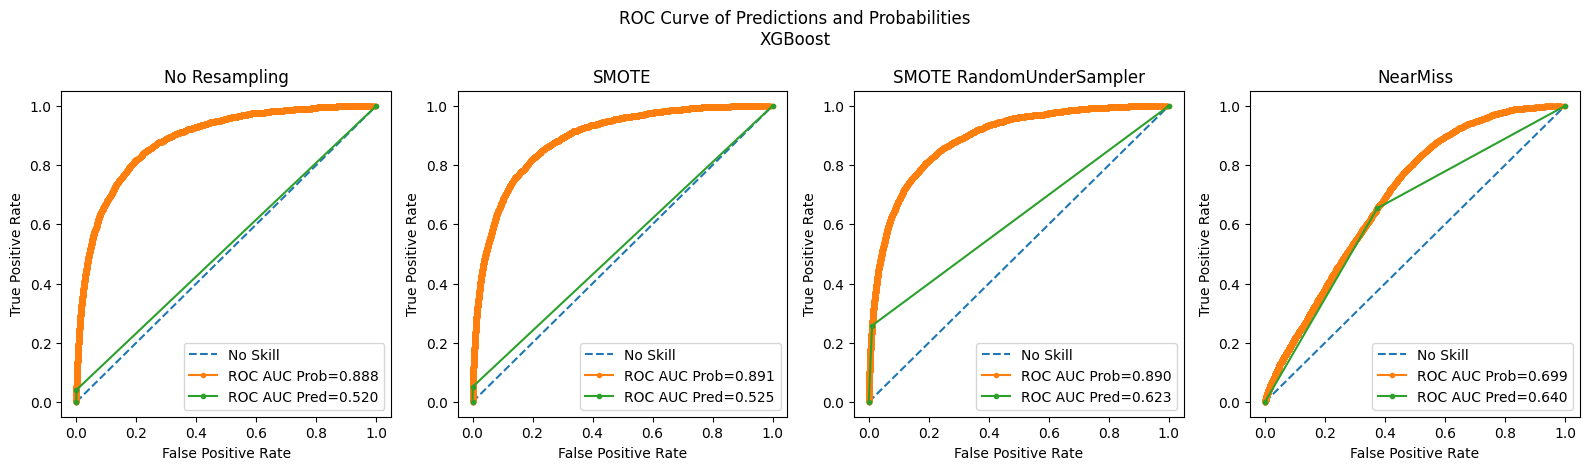

In [60]:
# Create subplots for ROC Predictions and Probabilities Curves

for i in range(0, len(results_pred), 4):
    fig, axes = plt.subplots(1, 4, figsize=(16, 4.75))
    fig.suptitle('ROC Curve of Predictions and Probabilities\n' + results_prob[i][0])
    for j in range(4):
        subtitle = results_prob[i+j][1]
        ns_probs = [0 for _ in range(len(y_test))]
        ns_auc = roc_auc_score(y_test, ns_probs)
        model_auc_prob = roc_auc_score(y_test, results_prob[i+j][2])
        model_auc_pred = roc_auc_score(y_test, results_pred[i+j][2])
        
        # Calculate ROC Curves
        ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
        prob_fpr, prob_tpr, _ = roc_curve(y_test, results_prob[i+j][2])
        pred_fpr, pred_tpr, _ = roc_curve(y_test, results_pred[i+j][2])

        # Plot ROC Curves
        ax = axes[(i+j)%4]
        ax.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
        ax.plot(prob_fpr, prob_tpr, marker='.', label=('ROC AUC Prob=%.3f' % (model_auc_prob)))
        ax.plot(pred_fpr, pred_tpr, marker='.', label=('ROC AUC Pred=%.3f' % (model_auc_pred)))
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(subtitle, wrap=True)
        ax.legend(loc='lower right')

    plt.tight_layout()
    fig_name = ('plot_images/roc_curve/matplotlib_roc_curve_' + results_prob[i][0] + '.png').replace(" ", "_").lower()
    plt.savefig(fig_name, format='png', dpi=600)
    plt.show()

**Generate ROC Curves using Seaborn**

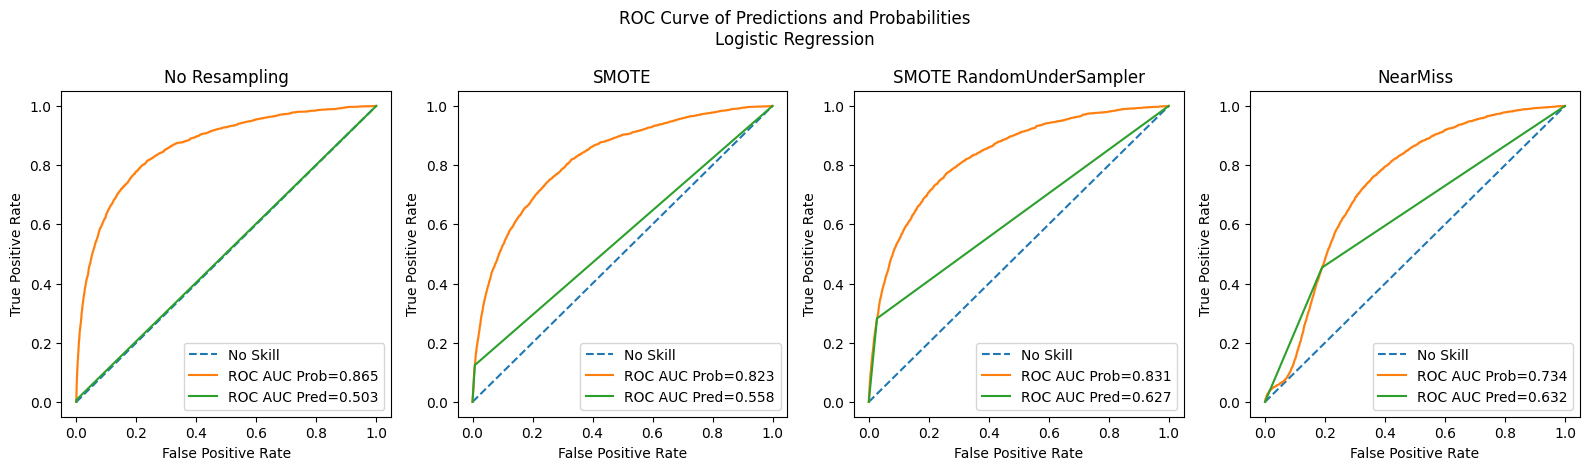

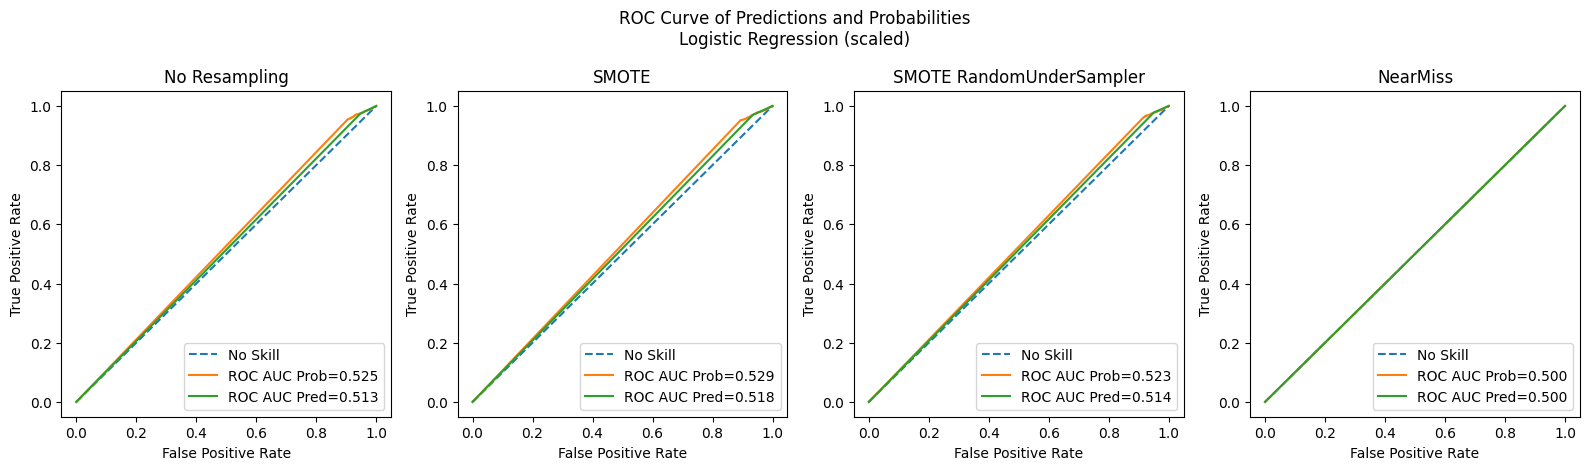

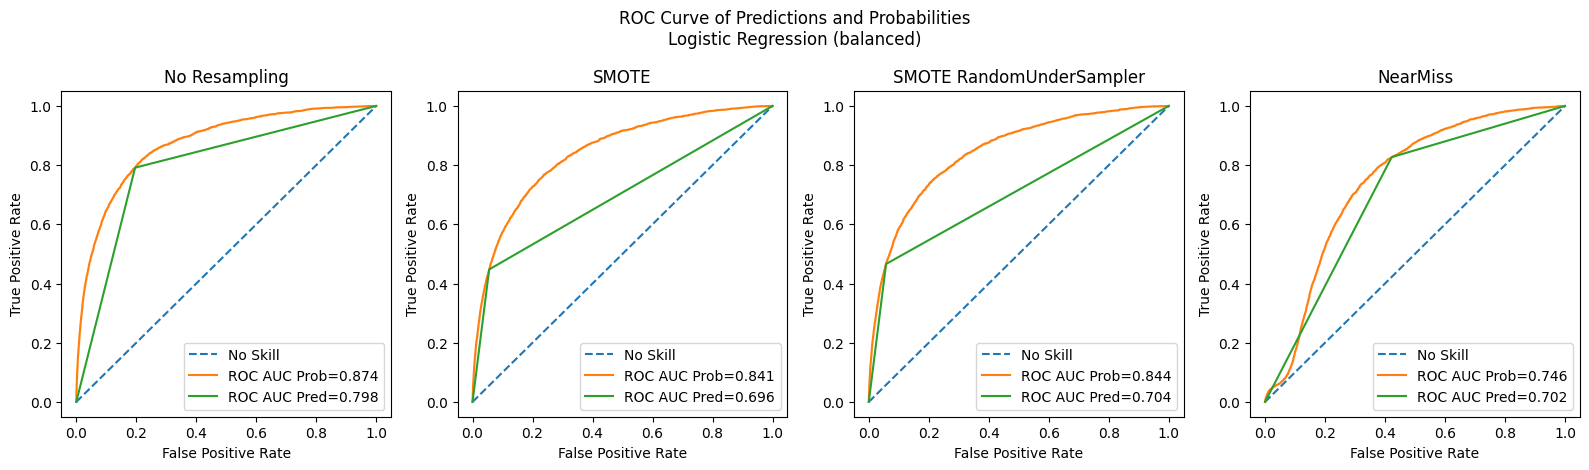

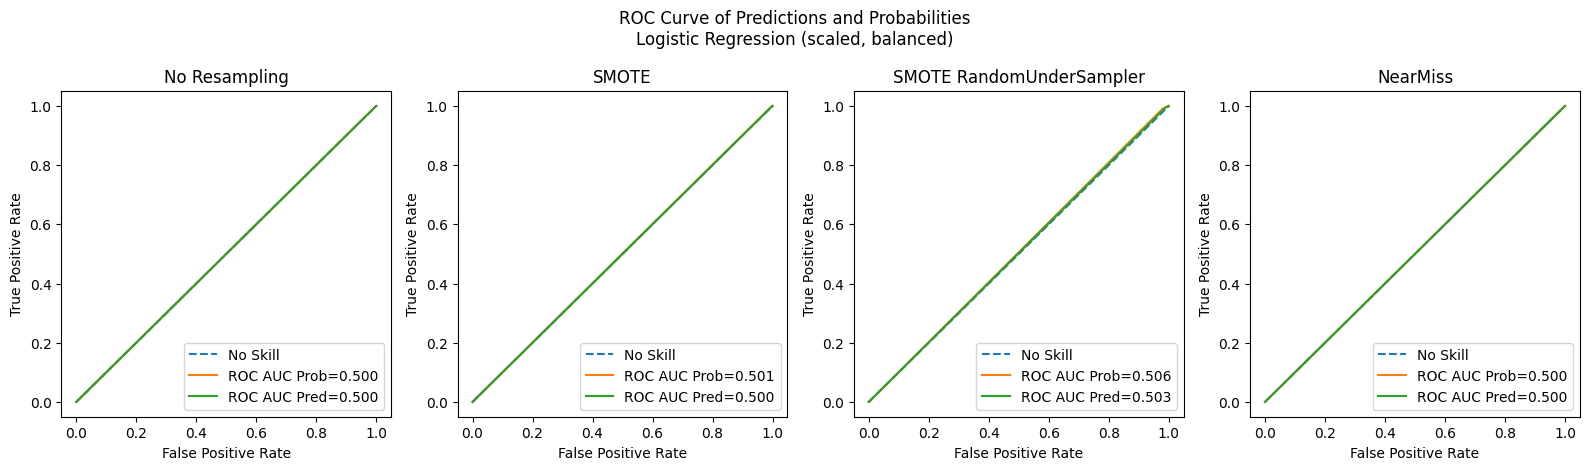

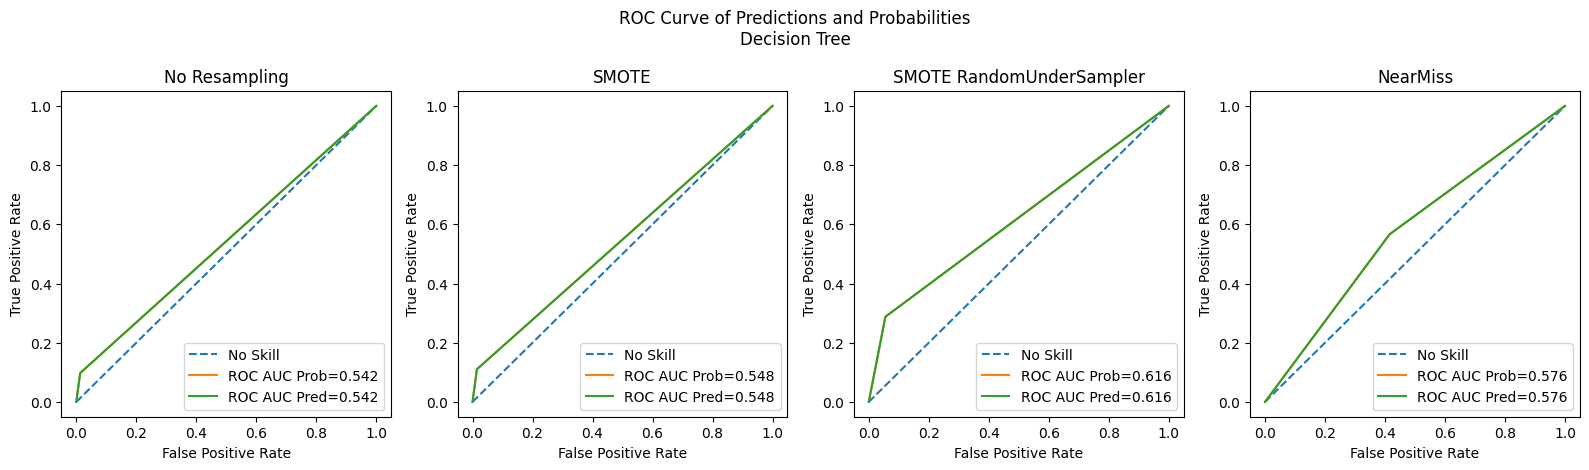

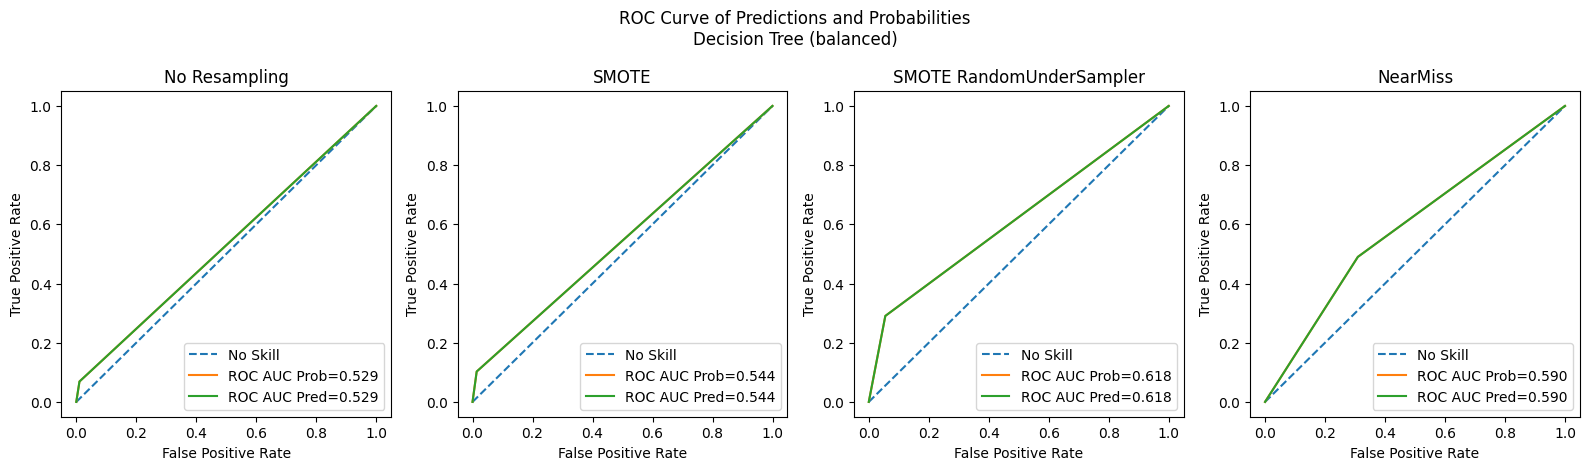

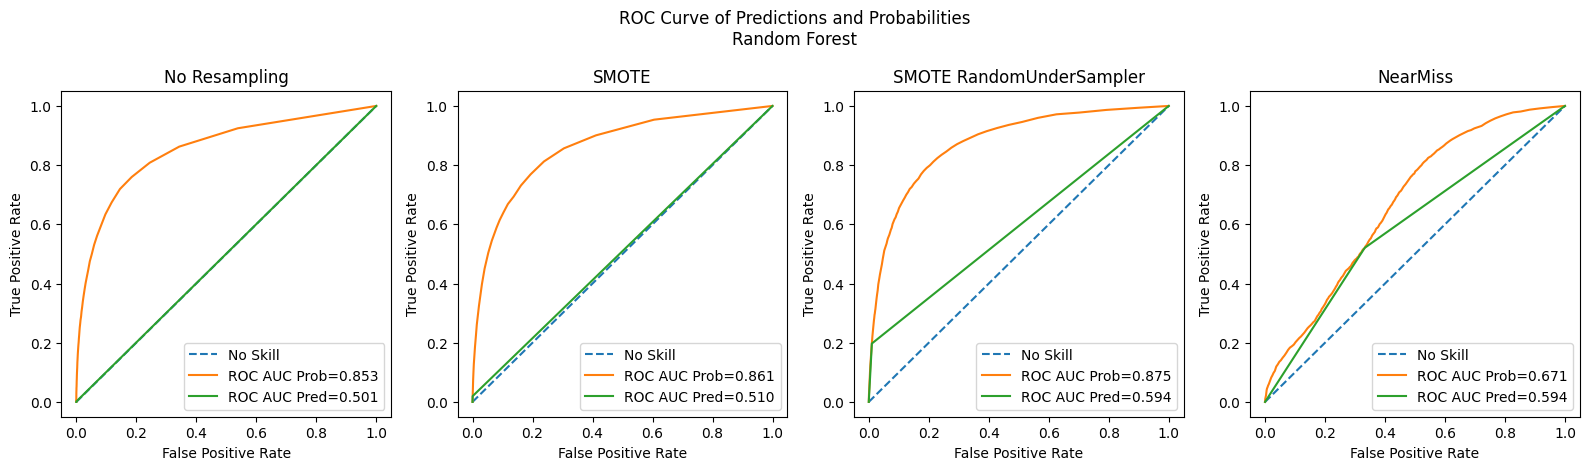

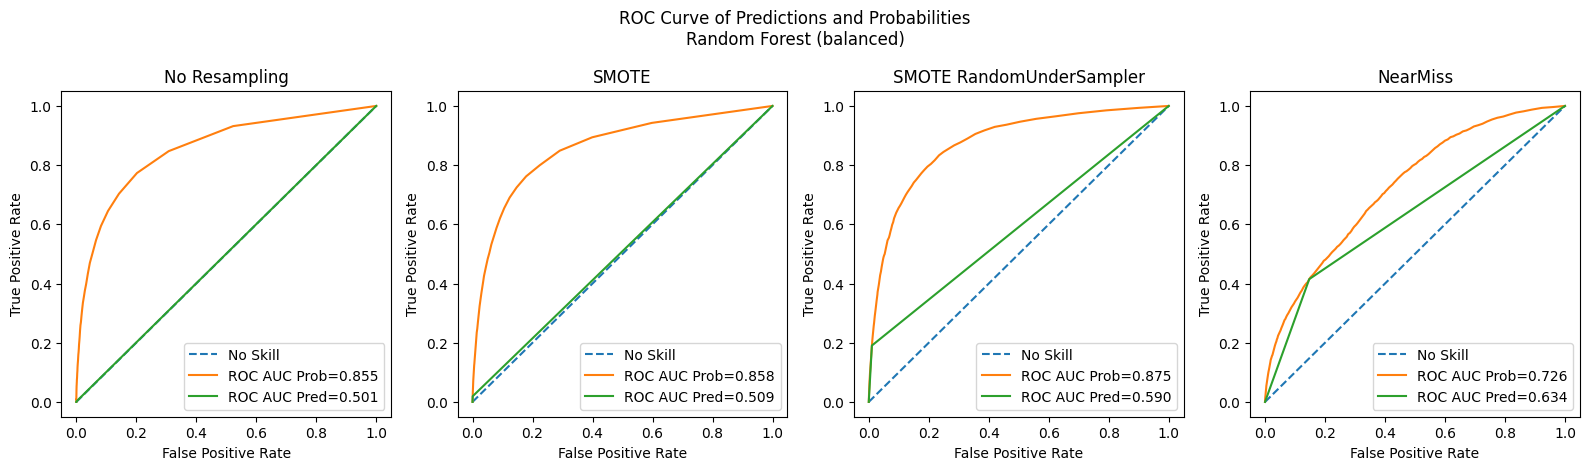

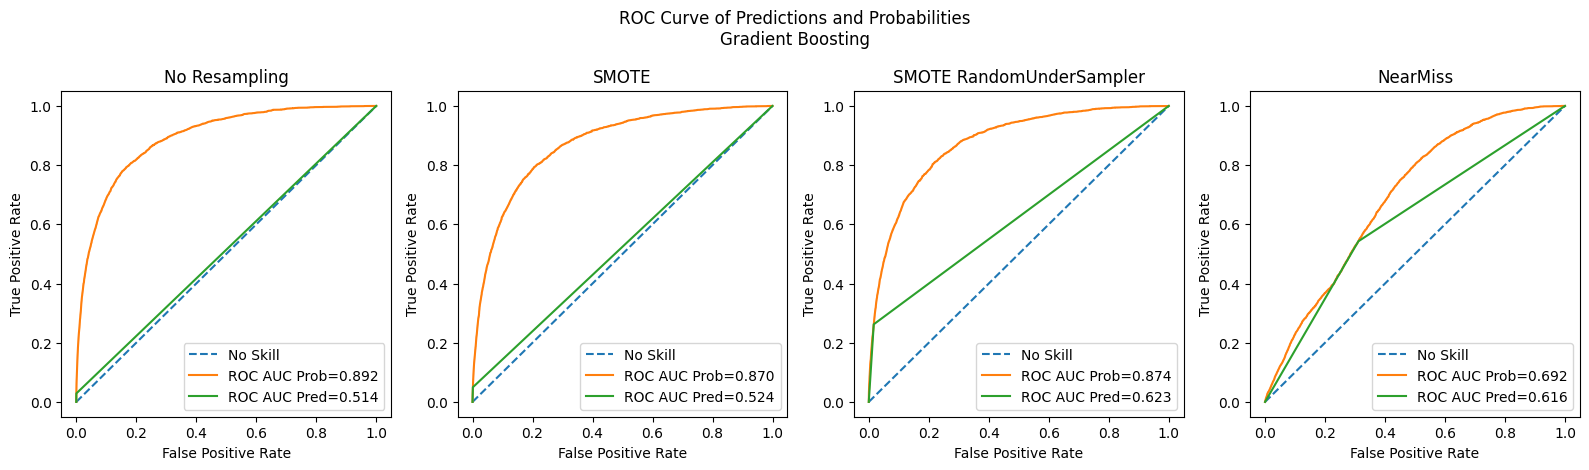

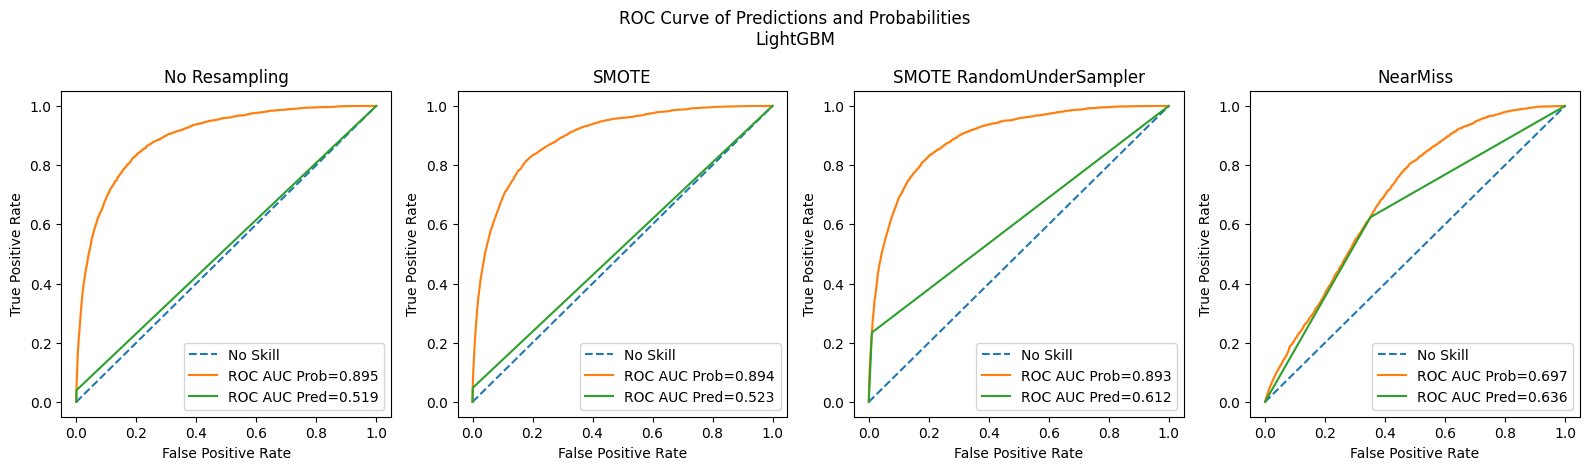

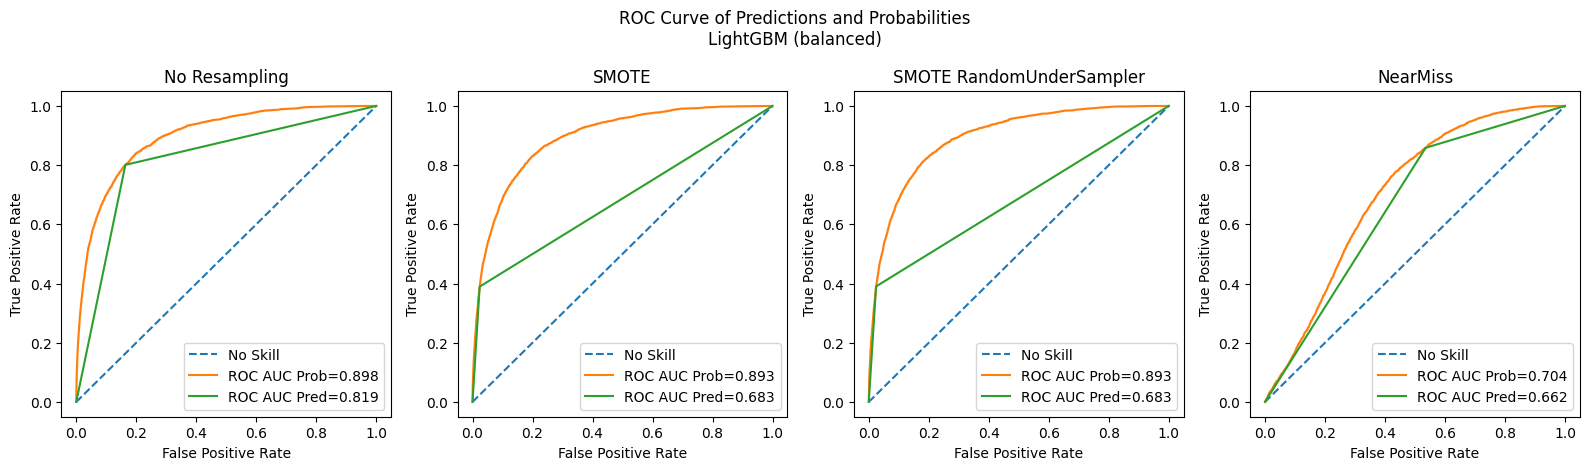

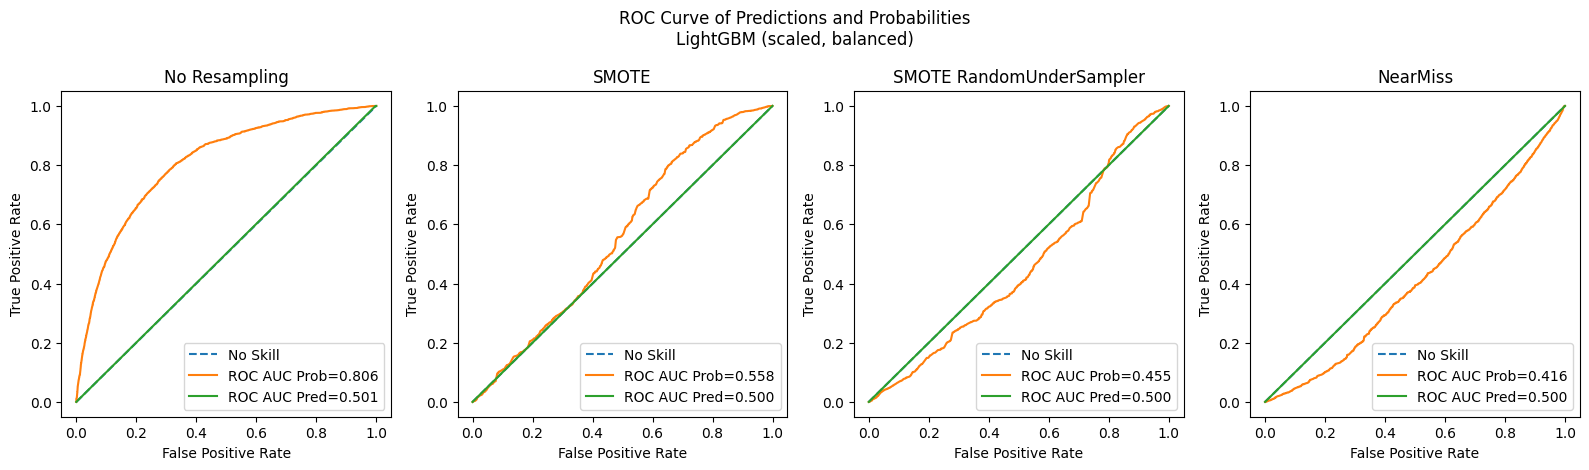

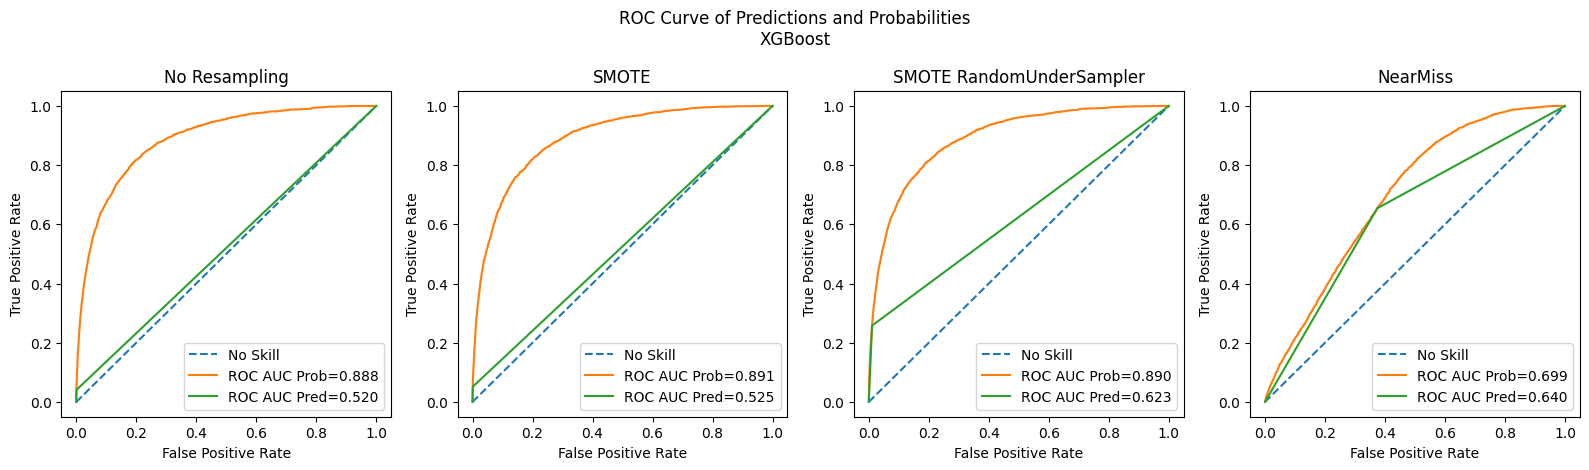

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for ROC Predictions and Probabilities Curves
for i in range(0, len(results_pred), 4):
    fig, axes = plt.subplots(1, 4, figsize=(16, 4.75))
    fig.suptitle('ROC Curve of Predictions and Probabilities\n' + results_prob[i][0])
    for j in range(4):
        #sns.set_palette(set_color_palette)
        subtitle = results_prob[i+j][1]
        ns_probs = [0 for _ in range(len(y_test))]
        ns_auc = roc_auc_score(y_test, ns_probs)
        model_auc_prob = roc_auc_score(y_test, results_prob[i+j][2])
        model_auc_pred = roc_auc_score(y_test, results_pred[i+j][2])
        
        # Calculate ROC Curves
        ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
        prob_fpr, prob_tpr, _ = roc_curve(y_test, results_prob[i+j][2])
        pred_fpr, pred_tpr, _ = roc_curve(y_test, results_pred[i+j][2])

        # Plot ROC Curves using Seaborn
        ax = axes[(i+j)%4]
        sns.lineplot(x=ns_fpr, y=ns_tpr, linestyle='--', label='No Skill', ax=ax)
        sns.lineplot(x=prob_fpr, y=prob_tpr, label=('ROC AUC Prob=%.3f' % (model_auc_prob)), ax=ax)
        sns.lineplot(x=pred_fpr, y=pred_tpr, label=('ROC AUC Pred=%.3f' % (model_auc_pred)), ax=ax)
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(subtitle, wrap=True)
        ax.legend(loc='lower right')

    plt.tight_layout()
    fig_name = ('plot_images/roc_curve/seaborn_roc_curve_' + results_prob[i][0] + '.png').replace(" ", "_").lower()
    plt.savefig(fig_name, format='png', dpi=600)
    plt.show()

**Generate Confusion Matrix**

In [56]:
fraud_count_test = y_test.sum()
nonfraud_count_test = len(y_test) - fraud_count_test

# Generate, plot and save confusion matrix
# Code modified from online example found here: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

def get_confusion_matrix(model_cm, model_name, sampler_name):

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}' .format(value) for value in model_cm.flatten()]
    group_percent_total = ['% Total', '% Total', '% Total', '% Total']
    group_percentages = ['{0:.2%}'.format(value) for value in model_cm.flatten()/np.sum(model_cm)]
    group_fraud_labels = ['% of Not Fraud', '', '', '% of Fraud']
    group_fraud_percents = [str('{0:.2%}'.format(model_cm.flatten()[0] / nonfraud_count_test)),'' ,'', str('{0:.2%}'.format(model_cm.flatten()[3] / fraud_count_test))]
    labels = [f'{v1}\n{v2}\n\n{v3}\n{v4}\n\n{v5}\n{v6}' for v1, v2, v3, v4, v5, v6 in zip(group_names,
                                                                                          group_counts,
                                                                                          group_percent_total, 
                                                                                          group_percentages,
                                                                                          group_fraud_labels,
                                                                                          group_fraud_percents)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(6.2, 5))
    sns.heatmap(model_cm, annot=labels, fmt='', cmap='Blues', cbar=False, square=True, yticklabels=['Not Fraud', 'Fraud'], xticklabels=['Not Fraud', 'Fraud'])
    plt.title('Confusion Matrix\n' + model_name + ' - ' + sampler_name)
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    fig_name = (('plot_images/confusion_matrix/confusion_matrix_' + model_name + '_' + sampler_name + '.png').replace(" ", "_").lower())
    plt.savefig(fig_name, format='png', dpi=600)
    plt.show()

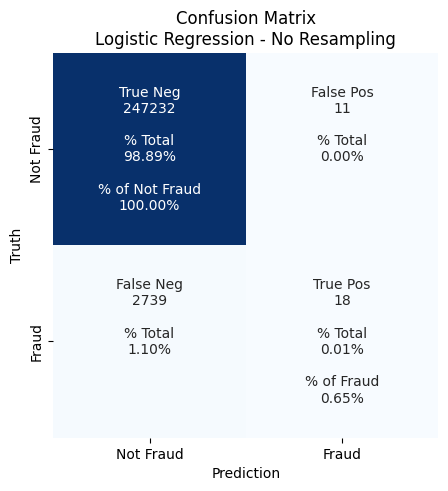

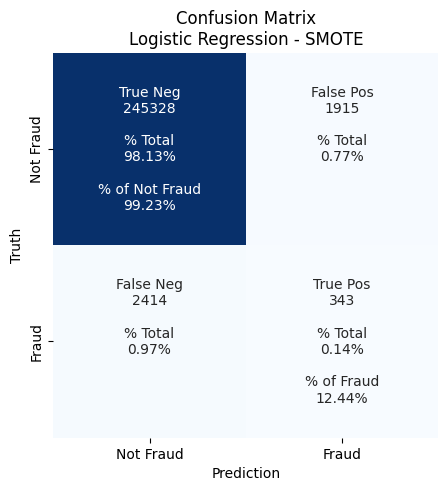

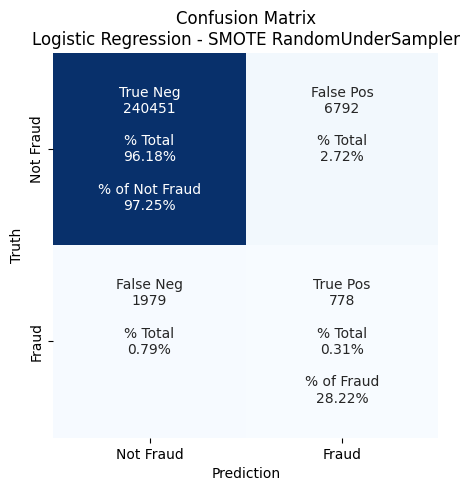

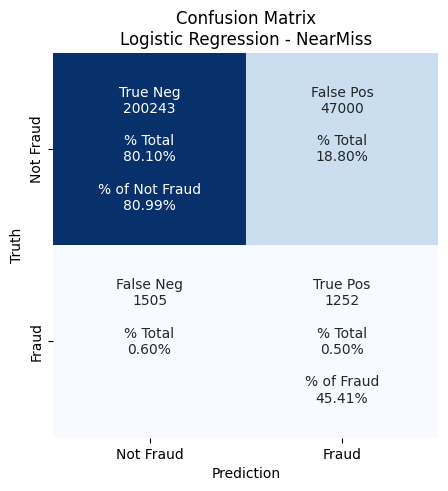

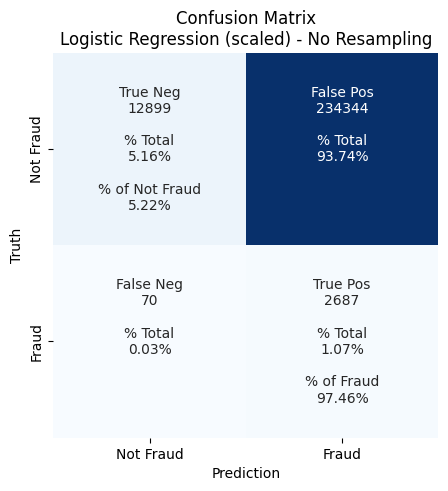

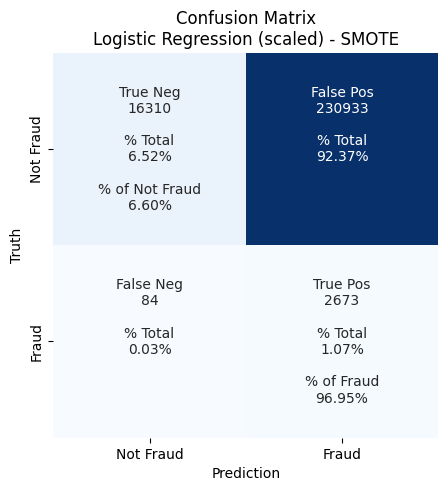

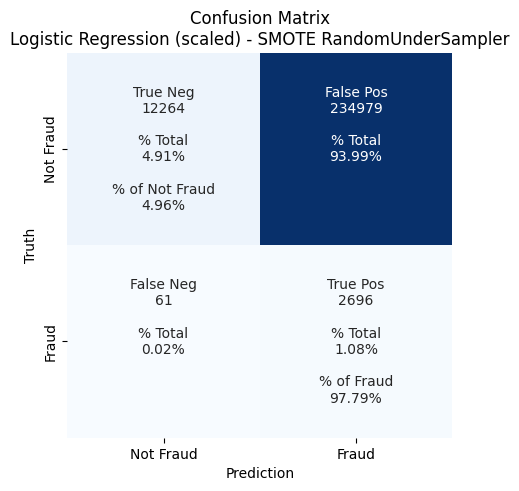

/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

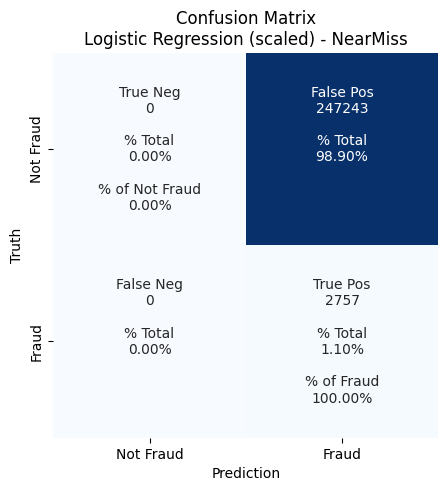

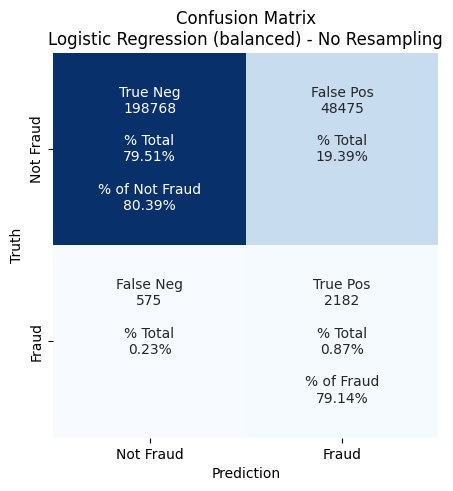

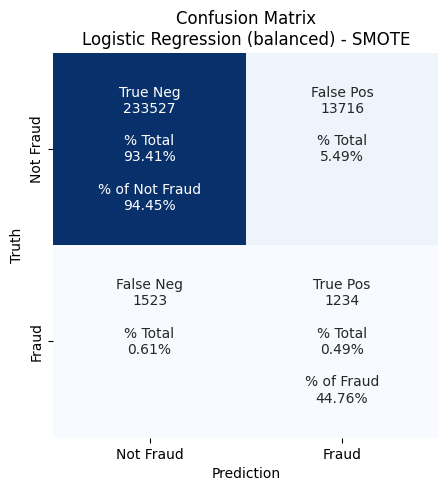

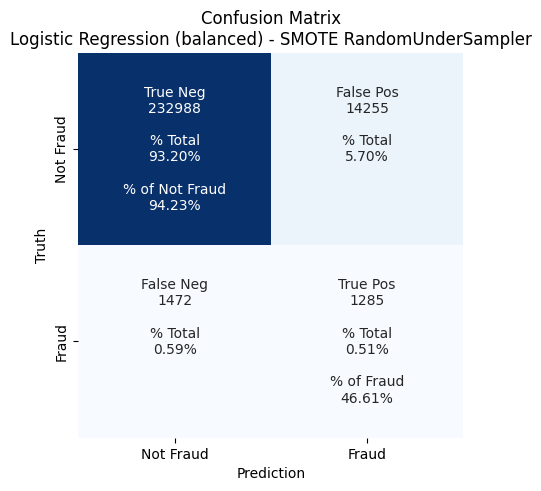

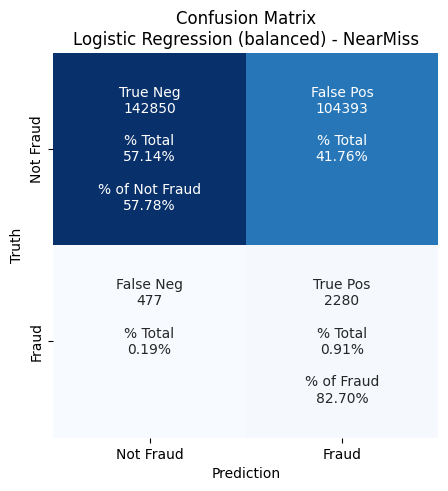

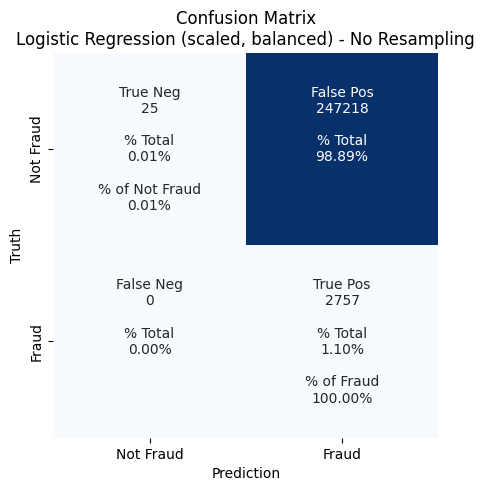

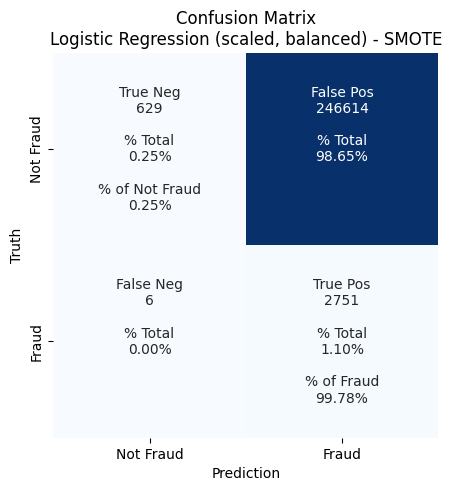

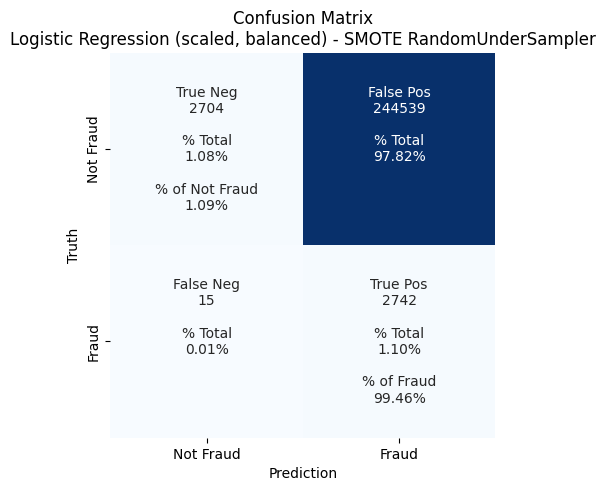

/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

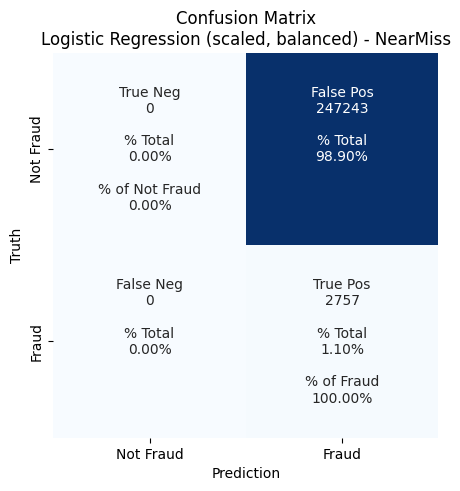

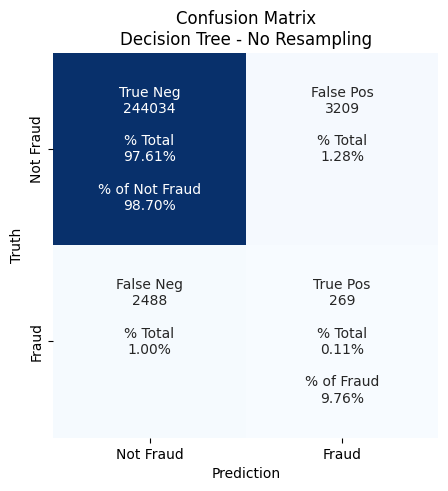

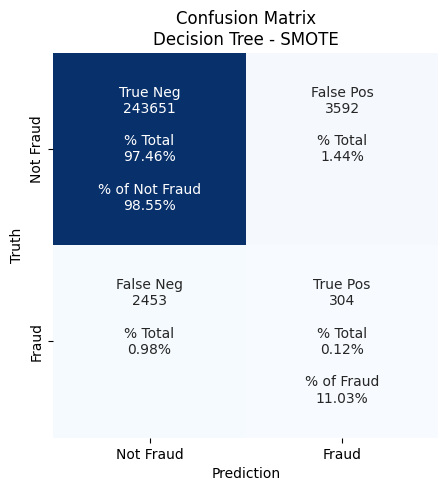

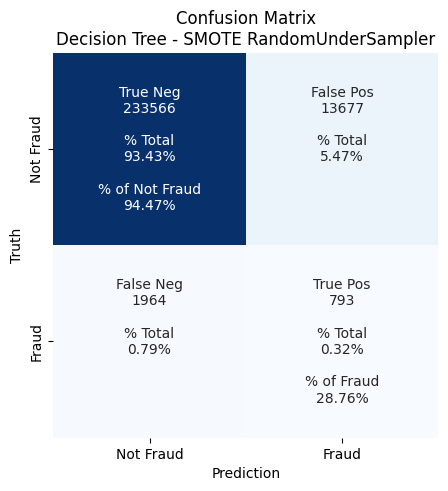

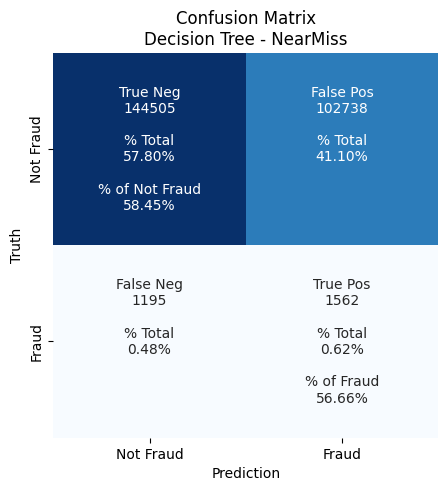

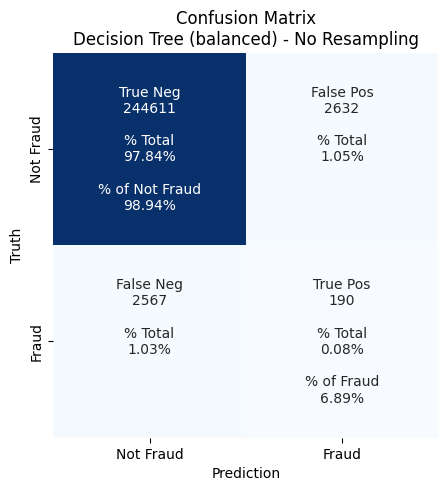

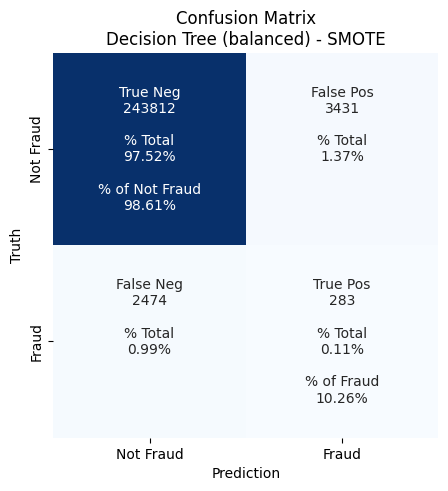

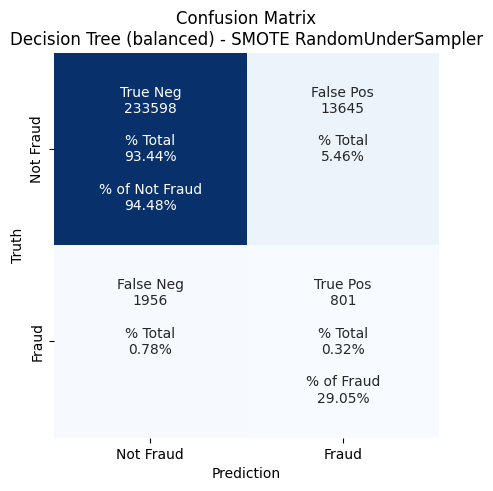

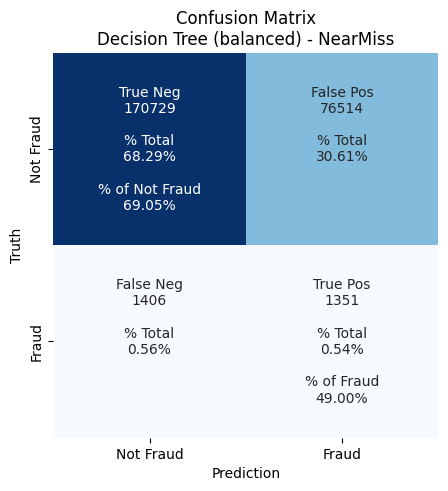

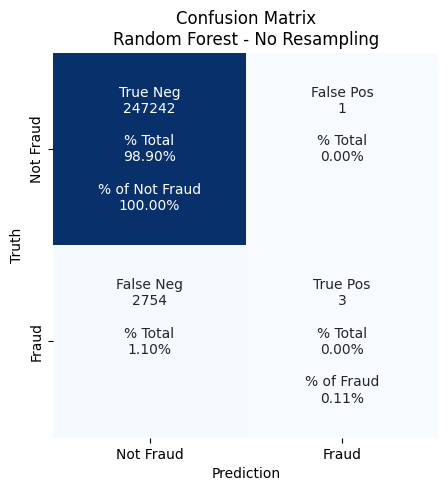

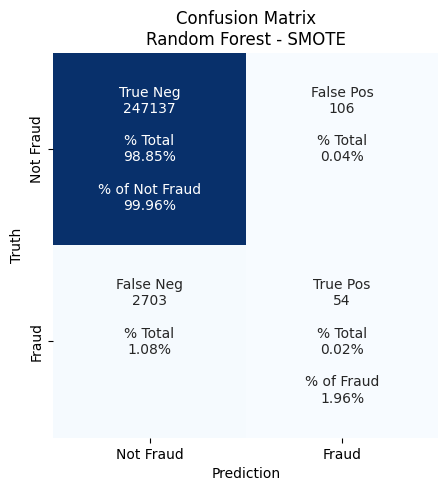

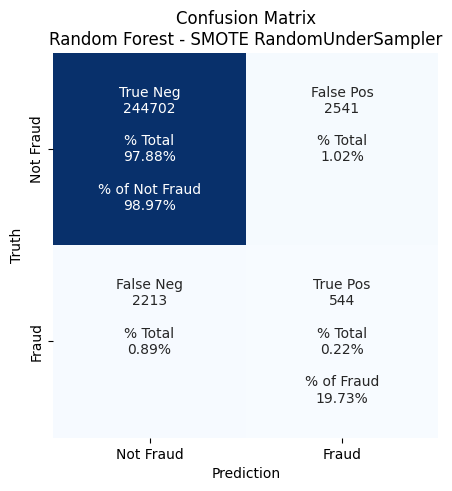

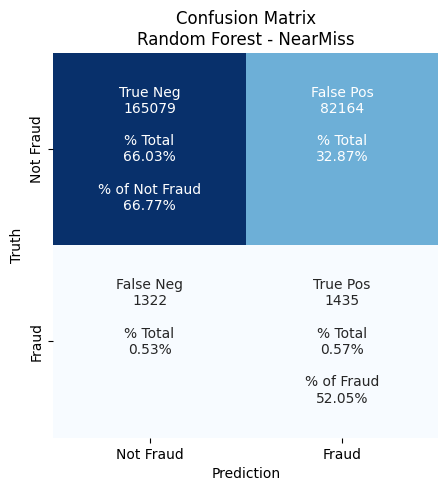

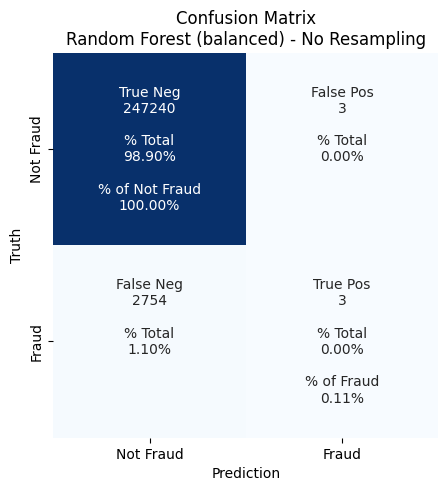

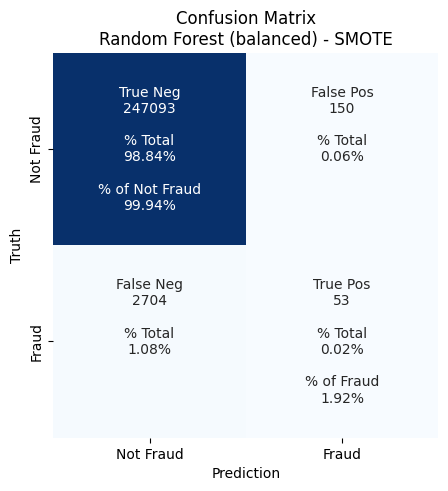

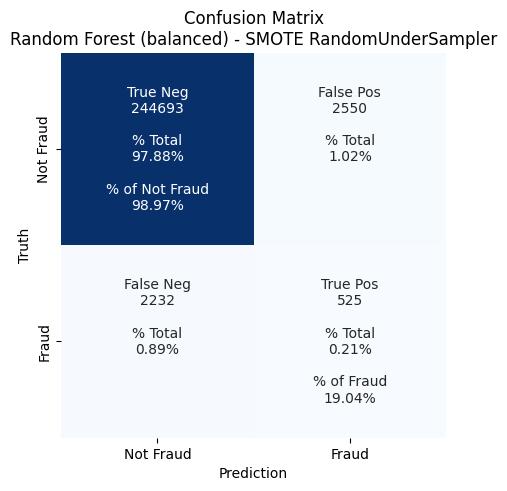

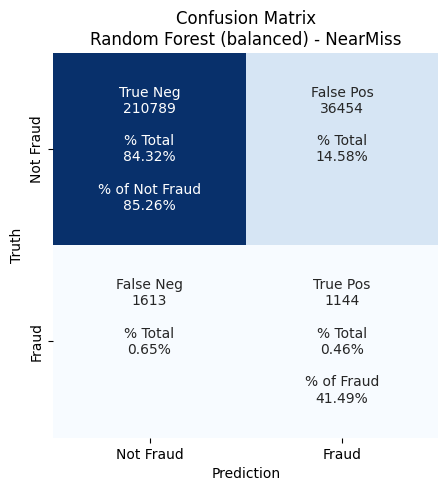

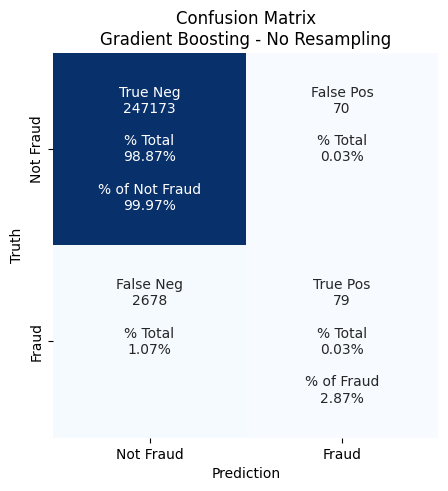

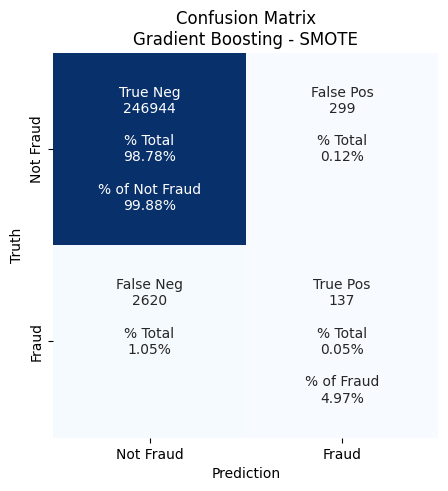

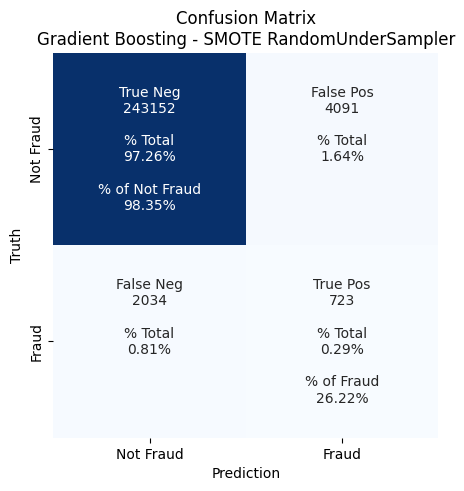

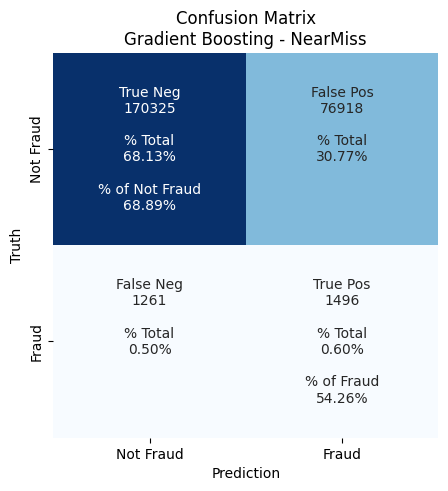

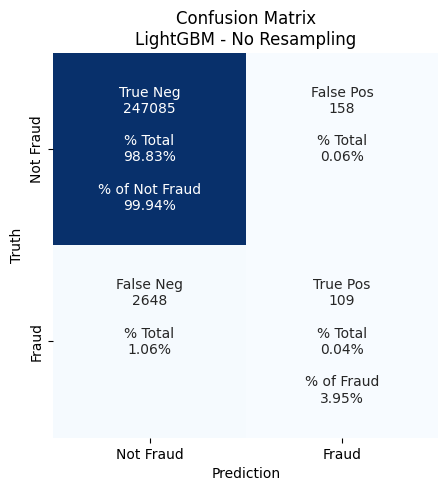

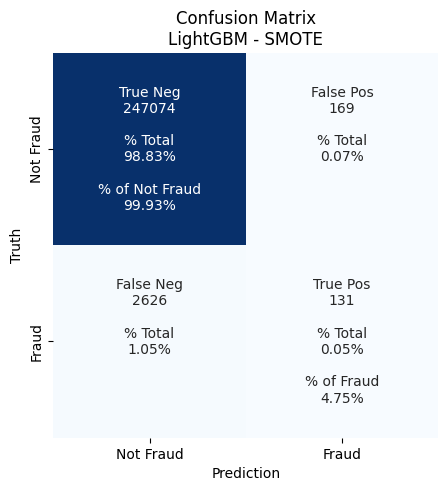

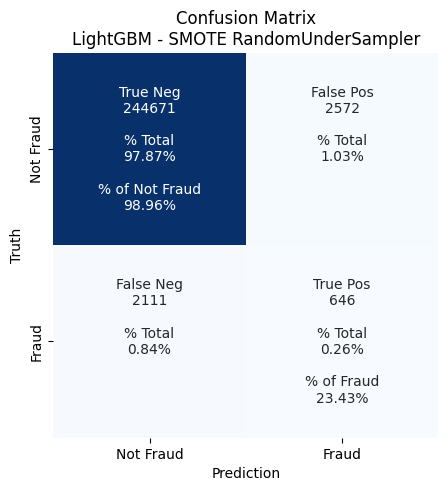

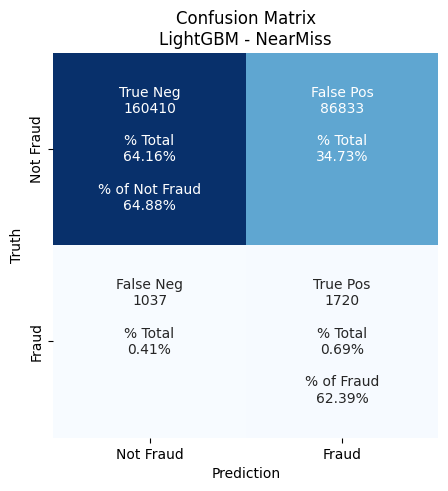

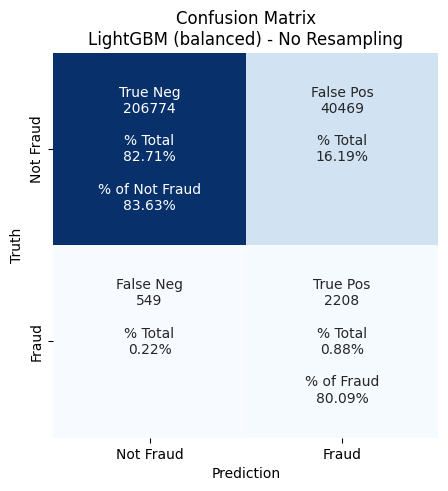

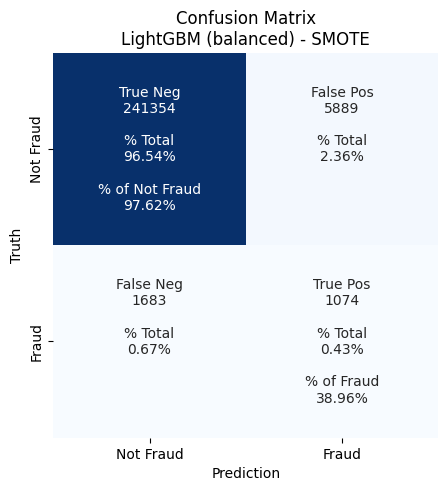

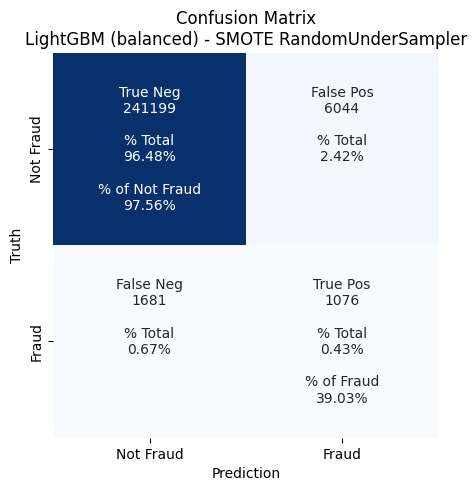

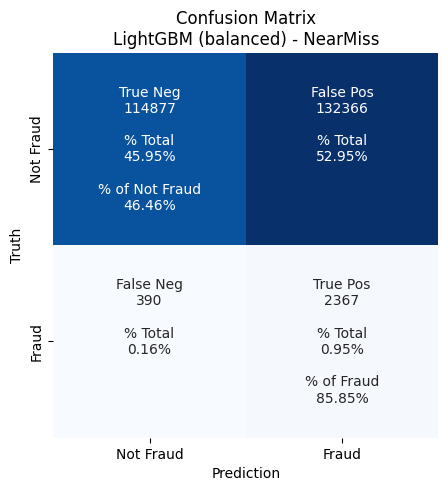

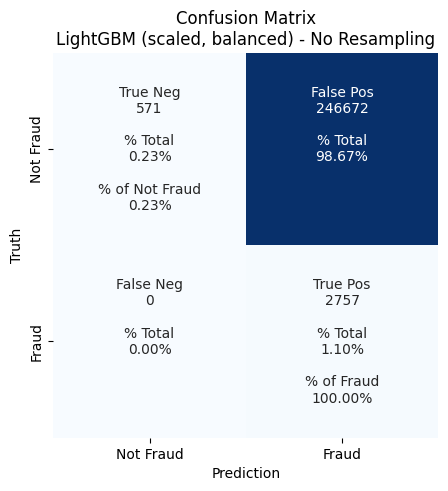

/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

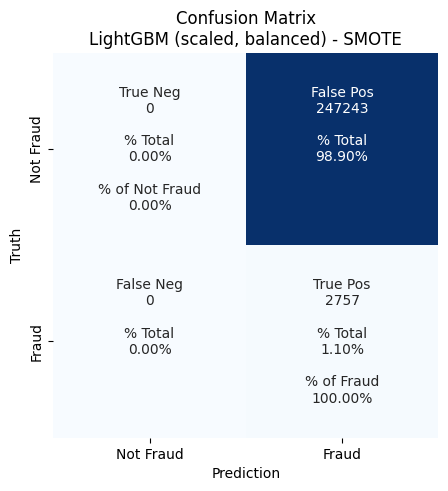

/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

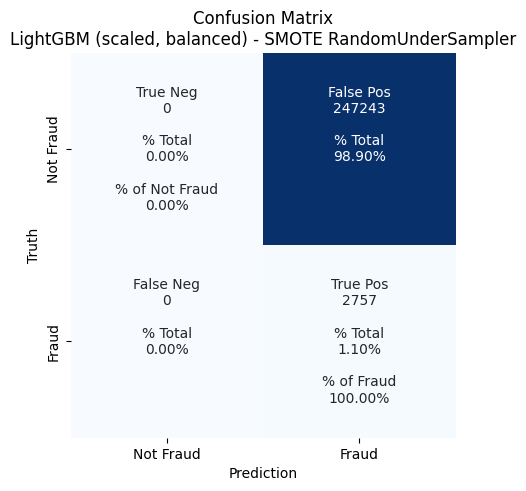

/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

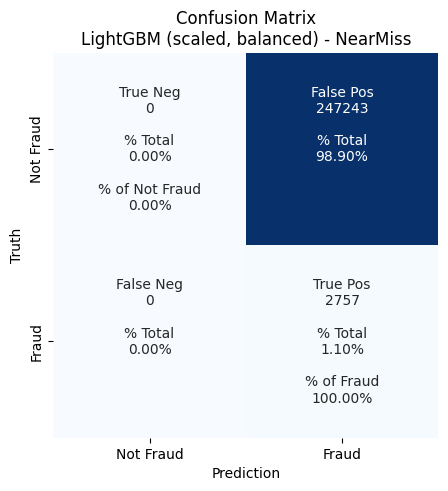

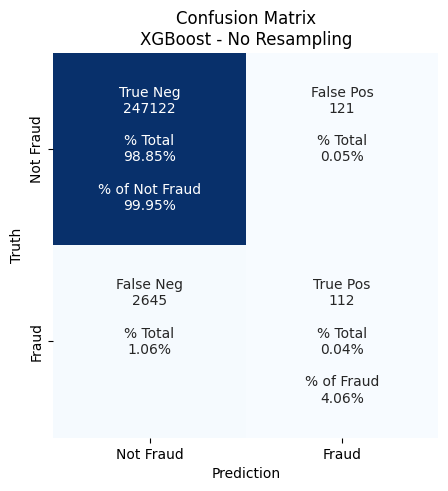

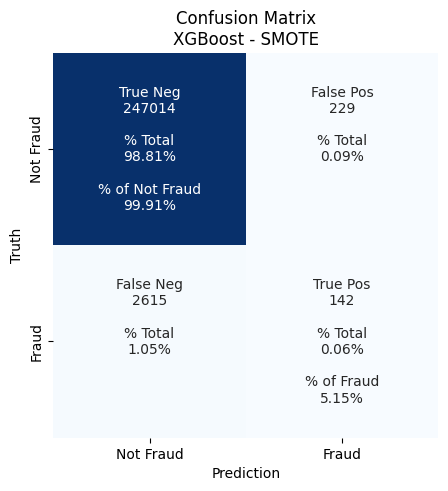

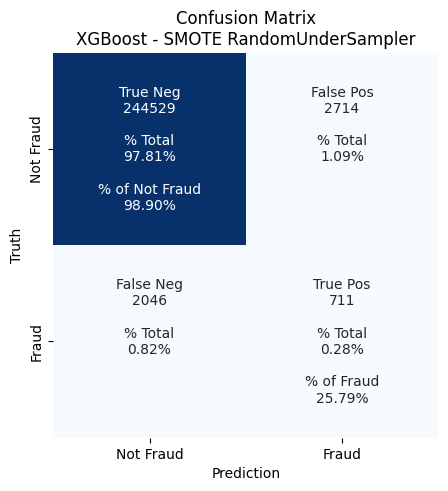

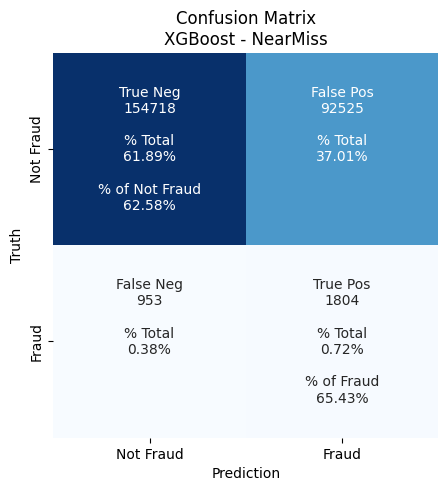

In [58]:
# Examine the LightGBM (balanced) with No Resampling model

for model_name, sampler_name, model_preds in results_pred:

    model_cm = classification_report(y_test, model_preds)
    model_cm = confusion_matrix(y_test, model_preds)

    get_confusion_matrix(model_cm, model_name, sampler_name)

**Classification Reports**

In [68]:
# Print Classification Reports for models

for model_name, sampler_name, model_preds in results_pred:
    print('Model:     ', model_name)
    print('Resampler: ', sampler_name)
    print('\nClassification Report:')
    class_report = classification_report(y_test, model_preds)

    print(class_report)
    print('*****************************************************\n')


Model:      Logistic Regression
Resampler:  No Resampling

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    247243
           1       0.62      0.01      0.01      2757

    accuracy                           0.99    250000
   macro avg       0.80      0.50      0.50    250000
weighted avg       0.98      0.99      0.98    250000

*****************************************************

Model:      Logistic Regression
Resampler:  SMOTE

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    247243
           1       0.15      0.12      0.14      2757

    accuracy                           0.98    250000
   macro avg       0.57      0.56      0.56    250000
weighted avg       0.98      0.98      0.98    250000

*****************************************************

Model:      Logistic Regression
Resampler:  SMOTE RandomUnderSampler

Classifica

/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    247243
           1       0.01      1.00      0.02      2757

    accuracy                           0.01    250000
   macro avg       0.01      0.50      0.01    250000
weighted avg       0.00      0.01      0.00    250000

*****************************************************

Model:      Logistic Regression (balanced)
Resampler:  No Resampling

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    247243
           1       0.04      0.79      0.08      2757

    accuracy                           0.80    250000
   macro avg       0.52      0.80      0.49    250000
weighted avg       0.99      0.80      0.88    250000

*****************************************************

Model:      Logistic Regression (balanced)
Resampler:  SMOTE

Classification Report:
              precision    recall  f1-score   support

   

/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    247243
           1       0.01      1.00      0.02      2757

    accuracy                           0.01    250000
   macro avg       0.01      0.50      0.01    250000
weighted avg       0.00      0.01      0.00    250000

*****************************************************

Model:      Decision Tree
Resampler:  No Resampling

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    247243
           1       0.08      0.10      0.09      2757

    accuracy                           0.98    250000
   macro avg       0.53      0.54      0.54    250000
weighted avg       0.98      0.98      0.98    250000

*****************************************************

Model:      Decision Tree
Resampler:  SMOTE

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99    

/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    247243
           1       0.01      1.00      0.02      2757

    accuracy                           0.01    250000
   macro avg       0.01      0.50      0.01    250000
weighted avg       0.00      0.01      0.00    250000

*****************************************************

Model:      LightGBM (scaled, balanced)
Resampler:  SMOTE RandomUnderSampler

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    247243
           1       0.01      1.00      0.02      2757

    accuracy                           0.01    250000
   macro avg       0.01      0.50      0.01    250000
weighted avg       0.00      0.01      0.00    250000

*****************************************************

Model:      LightGBM (scaled, balanced)
Resampler:  NearMiss

Classification Report:


/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/anthony/.pyenv/versions/3.12.1/envs/orie5741/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    247243
           1       0.01      1.00      0.02      2757

    accuracy                           0.01    250000
   macro avg       0.01      0.50      0.01    250000
weighted avg       0.00      0.01      0.00    250000

*****************************************************

Model:      XGBoost
Resampler:  No Resampling

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    247243
           1       0.48      0.04      0.07      2757

    accuracy                           0.99    250000
   macro avg       0.74      0.52      0.53    250000
weighted avg       0.98      0.99      0.98    250000

*****************************************************

Model:      XGBoost
Resampler:  SMOTE

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    24